# Global Factors Influencing Tertiary Education Enrollment

## Continued EDA, Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tee = pd.read_csv('wdi_agg_clean.csv')
tee.shape

(41, 37)

We can see that this dataset contains 41 observations and 37 columns or attributes.

Next, we can view a sample of this dataset. Attributes include country names, access to utilities, birth and fertility rates, literacy rates, and employment information:

In [3]:
# limit float to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [4]:
tee.head().T

0  \
Country Name                                        Africa Eastern and Southern   
Access to clean fuels and technologies for cook...                        19.79   
Access to electricity (% of population)                                   44.39   
Adolescent fertility rate (births per 1,000 wom...                        99.09   
Age dependency ratio (% of working-age population)                        82.69   
Birth rate, crude (per 1,000 people)                                      34.34   
Contributing family workers, total (% of total ...                        22.66   
Current health expenditure (% of GDP)                                      5.80   
Employment in agriculture (% of total employmen...                        55.96   
Employment in industry (% of total employment) ...                        10.78   
Employment in services (% of total employment) ...                        33.26   
Fertility rate, total (births per woman)                                   4.48   
GDP per capita (current US$)                                            1499.95   
Government expenditure on education, total (% o...                         4.60   
Immunization, DPT (% of children ages 12-23 mon...                        79.24   
Immunization, measles (% of children ages 12-23...                        74.44   
Individuals using the Internet (% of population)                          22.59   
Life expectancy at birth, total (years)                                   63.76   
Literacy rate, adult total (% of people ages 15...                        71.57   
Mortality rate, infant (per 1,000 live births)                            44.08   
Out-of-pocket expenditure (% of current health ...                        15.77   
People using at least basic drinking water serv...                        56.88   
People using at least basic sanitation services...                        31.16   
Population growth (annual %)                                               2.69   
Preprimary education, duration (years)                                     3.00   
Probability of dying among adolescents ages 10-...                         5.45   
Probability of dying among adolescents ages 15-...                        10.49   
Probability of dying among children ages 5-9 ye...                         8.00   
Probability of dying among youth ages 20-24 yea...                        13.66   
School enrollment, preprimary (% gross)                                   29.22   
School enrollment, secondary (% gross)                                    42.51   
School enrollment, tertiary (% gross)                                      9.10   
Total alcohol consumption per capita (liters of...                         4.61   
Urban population (% of total population)                                  36.34   
Urban population growth (annual %)                                         4.09   
Vulnerable employment, total (% of total employ...                        70.51   
Wage and salaried workers, total (% of total em...                        27.02   

                                                                             1  \
Country Name                                        Africa Western and Central   
Access to clean fuels and technologies for cook...                       14.29   
Access to electricity (% of population)                                  51.16   
Adolescent fertility rate (births per 1,000 wom...                      108.78   
Age dependency ratio (% of working-age population)                       87.04   
Birth rate, crude (per 1,000 people)                                     37.03   
Contributing family workers, total (% of total ...                       15.54   
Current health expenditure (% of GDP)                                     3.35   
Employment in agriculture (% of total employmen...                       44.31   
Employment in industry (% of total employment) ...                       12.47   
Employment in service

In [5]:
tee.tail()

Country Name  \
36  Pre-demographic dividend   
37              Small states   
38                South Asia   
39        Sub-Saharan Africa   
40       Upper middle income   

    Access to clean fuels and technologies for cooking (% of population)  \
36                                              17.87                      
37                                              62.05                      
38                                              56.41                      
39                                              17.56                      
40                                              83.21                      

    Access to electricity (% of population)  \
36                                    47.58   
37                                    81.62   
38                                    95.31   
39                                    47.13   
40                                    99.24   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
36                                             108.75               
37                                              55.70               
38                                              29.69               
39                                             102.98               
40                                              30.62               

    Age dependency ratio (% of working-age population)  \
36                                              87.71    
37                                              55.86    
38                                              52.98    
39                                              84.45    
40                                              46.18    

    Birth rate, crude (per 1,000 people)  \
36                                 36.76   
37                                 20.97   
38                                 18.93   
39                                 35.43   
40                                 12.87   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
36                                              18.79                                   
37                                               5.86                                   
38                                              12.84                                   
39                                              19.98                                   
40                                               8.76                                   

    Current health expenditure (% of GDP)  \
36                                   3.88   
37                                   5.17   
38                                   3.00   
39                                   4.69   
40                                   5.69   

    Employment in agriculture (% of total employment) (modeled ILO estimate)  \
36                                              51.09                          
37                                              18.51                          
38                                              40.79                          
39                                              51.58                          
40                                              21.95                          

    Employment in industry (% of total employment) (modeled ILO estimate)  \
36                                              11.23                       
37                                              23.39                       
38                                              24.60                       
39                                              11.41                       
40                                              25.24                       

    ...  Probability of dying among children ages 5-9 years (per 1,000)  \
36  ...                                              10.54                
37  ...                                               4.47                
38  ...                                               2.50                
39  

Looking at an overview of the entire dataset tells us the number of entries, datatypes, and whether there are missing values. In this case, we know there are no missing values since the dataset has been cleaned:

In [6]:
tee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 37 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country Name                                                                                          41 non-null     object 
 1   Access to clean fuels and technologies for cooking (% of population)                                  41 non-null     float64
 2   Access to electricity (% of population)                                                               41 non-null     float64
 3   Adolescent fertility rate (births per 1,000 women ages 15-19)                                         41 non-null     float64
 4   Age dependency ratio (% of working-age population)                                                    41 n

There is 1 categorical column, country name. We may decide to convert it to numeric based on how valuable this action is to our analysis. The remaining 36 columns are numeric. Our data has already been prepared for analysis, but we can look at descriptive statistics as a reminder of the data's distribution:

In [7]:
tee.describe().T

count     mean      std  \
Access to clean fuels and technologies for cook...  41.00    65.54    30.73   
Access to electricity (% of population)             41.00    84.18    20.47   
Adolescent fertility rate (births per 1,000 wom...  41.00    49.83    31.95   
Age dependency ratio (% of working-age population)  41.00    59.99    14.15   
Birth rate, crude (per 1,000 people)                41.00    20.40     9.21   
Contributing family workers, total (% of total ...  41.00    10.01     7.24   
Current health expenditure (% of GDP)               41.00     6.14     2.78   
Employment in agriculture (% of total employmen...  41.00    27.22    17.29   
Employment in industry (% of total employment) ...  41.00    21.05     5.66   
Employment in services (% of total employment) ...  41.00    51.73    13.53   
Fertility rate, total (births per woman)            41.00     2.71     1.19   
GDP per capita (current US$)                        41.00 11012.54 13938.69   
Government expenditure on education, total (% o...  41.00     3.89     0.61   
Immunization, DPT (% of children ages 12-23 mon...  41.00    86.05     8.02   
Immunization, measles (% of children ages 12-23...  41.00    85.41     9.32   
Individuals using the Internet (% of population)    41.00    54.58    22.29   
Life expectancy at birth, total (years)             41.00    71.53     6.41   
Literacy rate, adult total (% of people ages 15...  41.00    83.59    13.42   
Mortality rate, infant (per 1,000 live births)      41.00    26.08    18.17   
Out-of-pocket expenditure (% of current health ...  41.00    33.95    13.14   
People using at least basic drinking water serv...  41.00    86.51    13.79   
People using at least basic sanitation services...  41.00    73.33    23.85   
Population growth (annual %)                        41.00     1.29     0.90   
Preprimary education, duration (years)              41.00     4.11     1.33   
Probability of dying among adolescents ages 10-...  41.00     2.85     2.02   
Probability of dying among adolescents ages 15-...  41.00     5.23     3.08   
Probability of dying among children ages 5-9 ye...  41.00     3.85     3.52   
Probability of dying among youth ages 20-24 yea...  41.00     7.01     3.77   
School enrollment, preprimary (% gross)             41.00    57.88    24.80   
School enrollment, secondary (% gross)              41.00    76.95    22.52   
School enrollment, tertiary (% gross)               41.00    39.34    24.35   
Total alcohol consumption per capita (liters of...  41.00     5.30     2.77   
Urban population (% of total population)            41.00    56.76    15.62   
Urban population growth (annual %)                  41.00     2.18     1.25   
Vulnerable employment, total (% of total employ...  41.00    42.94    23.07   
Wage and salaried workers, total (% of total em...  41.00    53.76    22.55   

                                                      min     25%     50%  \
Access to clean fuels and technologies for cook...  13.92   32.41   76.73   
Access to electricity (% of population)             41.84   74.09   96.61   
Adolescent fertility rate (births per 1,000 wom...   7.06   21.92   43.50   
Age dependency ratio (% of working-age population)  43.77   49.55   55.29   
Birth rate, crude (per 1,000 people)                 9.11   12.60   18.93   
Contributing family workers, total (% of total ...   0.06    4.44    9.20   
Current health expenditure (% of GDP)                3.00    4.61    5.34   
Employment in agriculture (% of total employmen...   1.66   14.18   24.60   
Employment in industry (% of total employment) ...  10.56   17.93   22.84   
Employment in services (% of total employment) ...  30.81   40.39   49.78   
Fertility rate, total (births per woman)             1.50    1.74    2.32   
GDP per capita (current US$)                       681.75 1906.89 7444.62   
Government expenditure on education, total (% o...   2.86    3.45    3.81   
Immunization, DPT (% of children ages 12-23 mon...

## Feature selection

Now that we have been reminded of what our data looks like, we will visualize the features to study their relationships, and try to reduce the dimensionality of the dataset. This is in an effort to reduce modeling complexity and overfitting.

### _Analytical Questions:_
 - Which aggregate has the highest enrollment in tertiary education enrollment? Which has the lowest?
 - How do employment factors affect tertiary education enrollment?
 - Which of the attributes contribute most to tertiary education enrollment?

#### Highest tertiary education enrollment:

In [8]:
tee.sort_values(by='School enrollment, tertiary (% gross)', ascending=False).head()

Country Name  \
33                                  North America   
16                                    High income   
9                                       Euro area   
34                                   OECD members   
11  Europe & Central Asia (excluding high income)   

    Access to clean fuels and technologies for cooking (% of population)  \
33                                             100.00                      
16                                              99.99                      
9                                              100.00                      
34                                              98.00                      
11                                              86.63                      

    Access to electricity (% of population)  \
33                                   100.00   
16                                    99.97   
9                                    100.00   
34                                    99.94   
11                                    99.89   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
33                                              15.56               
16                                              11.33               
9                                                7.06               
34                                              20.26               
11                                              20.04               

    Age dependency ratio (% of working-age population)  \
33                                              52.50    
16                                              53.65    
9                                               56.00    
34                                              53.88    
11                                              49.55    

    Birth rate, crude (per 1,000 people)  \
33                                 11.25   
16                                 10.11   
9                                   9.11   
34                                 10.91   
11                                 13.76   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
33                                               0.06                                   
16                                               0.97                                   
9                                                0.58                                   
34                                               1.66                                   
11                                               3.86                                   

    Current health expenditure (% of GDP)  \
33                                  16.24   
16                                  12.56   
9                                   10.24   
34                                  12.50   
11                                   5.37   

    Employment in agriculture (% of total employment) (modeled ILO estimate)  \
33                                               1.66                          
16                                               3.18                          
9                                                2.96                          
34                                               4.86                          
11                                              13.82                          

    Employment in industry (% of total employment) (modeled ILO estimate)  \
33                                              19.58                       
16                                              22.78                       
9                                               23.45                       
34                                              22.51                       
11                                              25.32                       

    ...  Probability of dying among children ages 5-9 years (per 1,000)  \
33  ...                                               0.60                
16  ...                                          

#### Lowest tertiary education enrollment:

In [9]:
tee.sort_values(by='School enrollment, tertiary (% gross)', ascending=False).tail()

Country Name  \
39                      Sub-Saharan Africa   
28                              Low income   
0              Africa Eastern and Southern   
15  Heavily indebted poor countries (HIPC)   
36                Pre-demographic dividend   

    Access to clean fuels and technologies for cooking (% of population)  \
39                                              17.56                      
28                                              15.21                      
0                                               19.79                      
15                                              13.92                      
36                                              17.87                      

    Access to electricity (% of population)  \
39                                    47.13   
28                                    41.84   
0                                     44.39   
15                                    45.05   
36                                    47.58   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
39                                             102.98               
28                                              98.19               
0                                               99.09               
15                                             103.82               
36                                             108.75               

    Age dependency ratio (% of working-age population)  \
39                                              84.45    
28                                              85.36    
0                                               82.69    
15                                              85.36    
36                                              87.71    

    Birth rate, crude (per 1,000 people)  \
39                                 35.43   
28                                 35.32   
0                                  34.34   
15                                 35.84   
36                                 36.76   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
39                                              19.98                                   
28                                              24.82                                   
0                                               22.66                                   
15                                              22.72                                   
36                                              18.79                                   

    Current health expenditure (% of GDP)  \
39                                   4.69   
28                                   4.90   
0                                    5.80   
15                                   4.61   
36                                   3.88   

    Employment in agriculture (% of total employment) (modeled ILO estimate)  \
39                                              51.58                          
28                                              58.63                          
0                                               55.96                          
15                                              56.93                          
36                                              51.09                          

    Employment in industry (% of total employment) (modeled ILO estimate)  \
39                                              11.41                       
28                                              10.56                       
0                                               10.78                       
15                                              11.08                       
36                                              11.23                       

    ...  Probability of dying among children ages 5-9 years (per 1,000)  \
39  ...                                              10.00                
28  ...                                               8.90                
0   ...  

The highest reported tertiary education enrollment percentages were for North America at 86.71%, followed by High income and Euro area at 78.56% and 77.02%, respectively. The lowest were Pre-demographic dividend at 8.74%, followed by Heavily indebted poor countries (HIPC) and Africa Eastern and Southern at 9.02% and 9.10%, respectively.

#### Employment factors:

<AxesSubplot:xlabel='School enrollment, tertiary (% gross)', ylabel='Wage and salaried workers, total (% of total employment) (modeled ILO estimate)'>

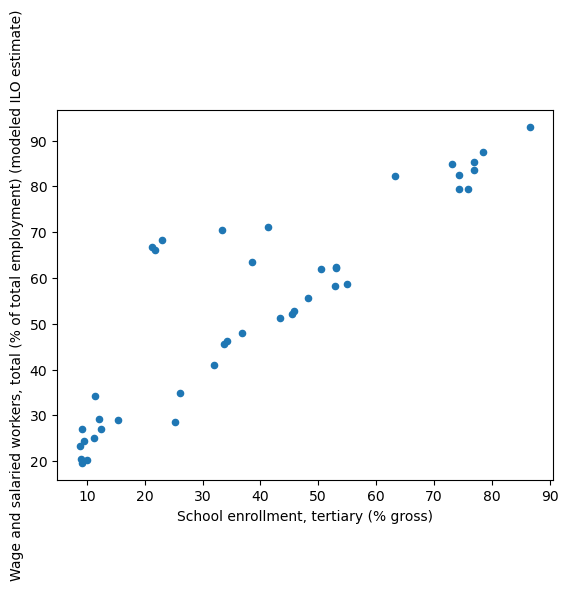

In [10]:
tee.plot.scatter(x='School enrollment, tertiary (% gross)', \
                 y='Wage and salaried workers, total (% of total employment) (modeled ILO estimate)')

<AxesSubplot:xlabel='School enrollment, tertiary (% gross)', ylabel='Vulnerable employment, total (% of total employment) (modeled ILO estimate)'>

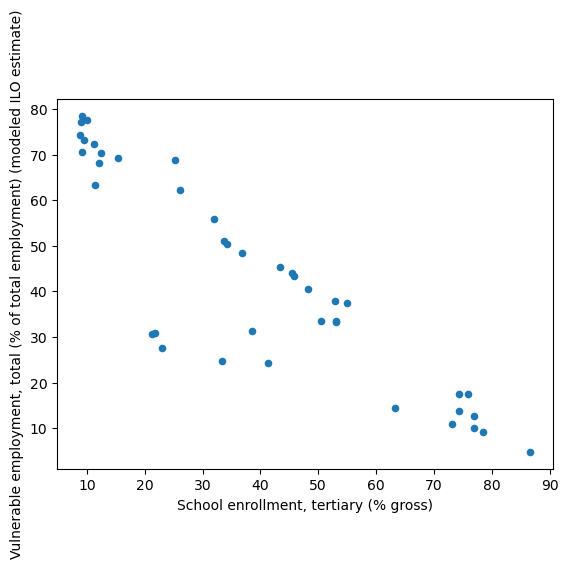

In [11]:
tee.plot.scatter(x='School enrollment, tertiary (% gross)', \
                 y='Vulnerable employment, total (% of total employment) (modeled ILO estimate)')

The percentage of wage and salaried workers appears to be positively correlated to tertiary education enrollment. Workers in this group, as the name suggests, get paid subject to formal engagement, and a high percentage of these workers suggests economic development. Some form of income also allows workers to better handle economic shifts and makes them more likely to invest in human capital.

The vulnerable workers population is negatively correlated to tertiary education enrollment. This group referes to contributing family workers (people engaged in a family member's business, without a formal arrangement or wage), and self-employed workers without employees. Vulnerable workers are less likely to withstand sudden economic downturns or have the financial ability to invest in human capital.

#### Strongest influencing factors:

In [12]:
corrmat = tee.drop(columns=['Country Name']).corr()
corrmat

Access to clean fuels and technologies for cooking (% of population)  \
Access to clean fuels and technologies for cook...                                               1.00                      
Access to electricity (% of population)                                                          0.95                      
Adolescent fertility rate (births per 1,000 wom...                                              -0.91                      
Age dependency ratio (% of working-age population)                                              -0.88                      
Birth rate, crude (per 1,000 people)                                                            -0.93                      
Contributing family workers, total (% of total ...                                              -0.94                      
Current health expenditure (% of GDP)                                                            0.63                      
Employment in agriculture (% of total employmen...                                              -0.95                      
Employment in industry (% of total employment) ...                                               0.84                      
Employment in services (% of total employment) ...                                               0.86                      
Fertility rate, total (births per woman)                                                        -0.92                      
GDP per capita (current US$)                                                                     0.60                      
Government expenditure on education, total (% o...                                               0.54                      
Immunization, DPT (% of children ages 12-23 mon...                                               0.82                      
Immunization, measles (% of children ages 12-23...                                               0.89                      
Individuals using the Internet (% of population)                                                 0.94                      
Life expectancy at birth, total (years)                                                          0.94                      
Literacy rate, adult total (% of people ages 15...                                               0.88                      
Mortality rate, infant (per 1,000 live births)                                                  -0.94                      
Out-of-pocket expenditure (% of current health ...                                              -0.66                      
People using at least basic drinking water serv...                                               0.95                      
People using at least basic sanitation services...                                               0.99                      
Population growth (annual %)                                                                    -0.88                      
Preprimary education, duration (years)                                                           0.69                      
Probability of dying among adolescents ages 10-...                                              -0.96                      
Probability of dying among adolescents ages 15-...                                              -0.93                      
Probability of dying among children ages 5-9 ye...                                              -0.95                      
Probability of dying among youth ages 20-24 yea...                                              -0.90                      
School enrollment, preprimary (% gross)                                                          0.77                      
School enrollment, secondary (% gross)                                                           0.96                      
School enrollment, tertiary (% gross)                                                            0.87                      
Total alcohol consumption per capita (liters of...                                  

The factors that appear to influence tertiary education enrollent the most include secondary school enrollment, life expectancy, utility access, waged and salaried working population and literacy rate (positive), mortality rate, urban population growth, and vulnerable working population (negative).

### Feature engineering

We have four columns related to the probability of dying, all with strong negative correlation to the target. We can try getting the average among different age groups to narrow down this probability to one value.

<AxesSubplot:ylabel='Frequency'>

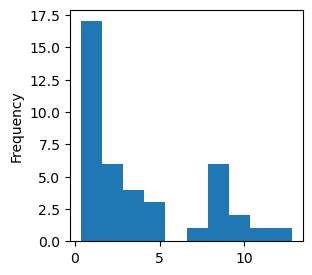

In [13]:
# plot distribution of probability of dying by age group
plt.figure(figsize=(3,3))
tee['Probability of dying among children ages 5-9 years (per 1,000)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

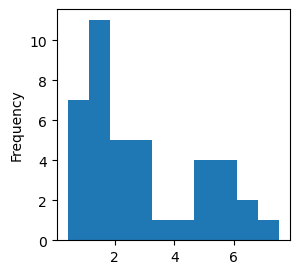

In [14]:
plt.figure(figsize=(3,3))
tee['Probability of dying among adolescents ages 10-14 years (per 1,000)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

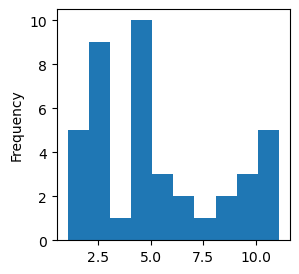

In [15]:
plt.figure(figsize=(3,3))
tee['Probability of dying among adolescents ages 15-19 years (per 1,000)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

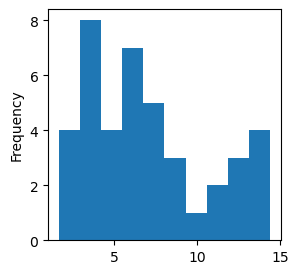

In [16]:
plt.figure(figsize=(3,3))
tee['Probability of dying among youth ages 20-24 years (per 1,000)'].plot.hist()

We can create simpler to work with column headings without losing their meaning.

In [17]:
tee_copy = tee.copy()
tee_copy['pod_5_9'] = tee_copy['Probability of dying among children ages 5-9 years (per 1,000)']
tee_copy['pod_10_14'] = tee_copy['Probability of dying among adolescents ages 10-14 years (per 1,000)']
tee_copy['pod_15_19'] = tee_copy['Probability of dying among adolescents ages 15-19 years (per 1,000)']
tee_copy['pod_20_24'] = tee_copy['Probability of dying among youth ages 20-24 years (per 1,000)']

In [18]:
# get average of four probability of dying columns
tee_2 = tee_copy.copy()
tee_2['pod_avg'] = (tee_2['pod_5_9'] + tee_2['pod_10_14'] + tee_2['pod_15_19'] + tee_2['pod_20_24']) / 4
tee_2['pod_avg']

0     9.40
1    10.53
2     4.63
3     3.77
4     1.41
5     3.90
6     2.20
7     2.30
8     2.28
9     0.86
10    1.48
11    2.09
12    2.02
13    0.97
14    9.21
15    9.86
16    1.48
17    3.05
18    4.70
19    7.36
20    8.21
21    7.93
22    2.06
23    3.73
24    3.56
25    3.73
26    8.60
27    4.71
28   10.07
29    4.62
30    3.33
31    3.52
32    3.90
33    2.10
34    1.77
35    6.42
36   10.37
37    5.82
38    3.85
39    9.88
40    2.40
Name: pod_avg, dtype: float64

The distribution of these columns is mostly right-skewed. We can try to normalize by using log transformation.

<AxesSubplot:ylabel='Frequency'>

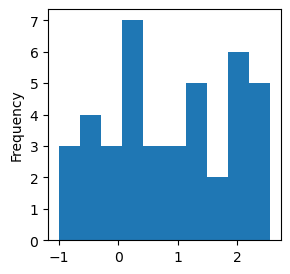

In [19]:
# log transformation
plt.figure(figsize=(3,3))
tee_copy['pod_5_9'] = np.log(tee_copy['pod_5_9'])
tee_copy['pod_5_9'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

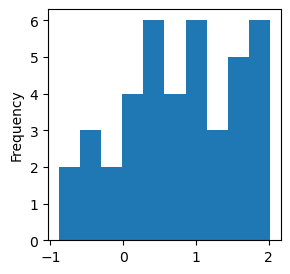

In [20]:
plt.figure(figsize=(3,3))
tee_copy['pod_10_14'] = np.log(tee_copy['pod_10_14'])
tee_copy['pod_10_14'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

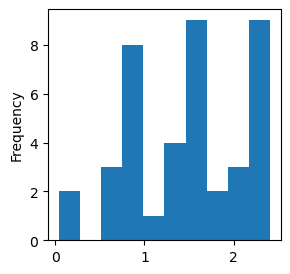

In [21]:
plt.figure(figsize=(3,3))
tee_copy['pod_15_19'] = np.log(tee_copy['pod_15_19'])
tee_copy['pod_15_19'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

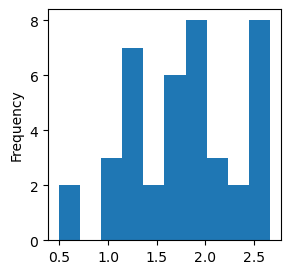

In [22]:
plt.figure(figsize=(3,3))
tee_copy['pod_20_24'] = np.log(tee_copy['pod_20_24'])
tee_copy['pod_20_24'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

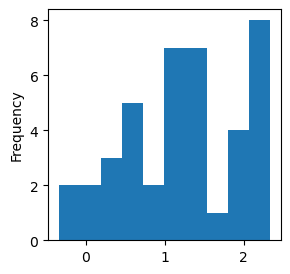

In [23]:
# get average of four probability of dying columns
tee_copy['pod_avg'] = (tee_copy['pod_5_9'] + tee_copy['pod_10_14'] + tee_copy['pod_15_19'] + tee_copy['pod_20_24']) / 4
# display distribution of feature after log transformation
plt.figure(figsize=(3,3))
tee_copy.pod_avg.plot.hist()

The log transformation shifted the distribution some, making it left-skewed, but did not do much to normalize.

We can view a sample of the tertiary education dataset with the new feature (not using log transformation):

In [24]:
# view sample of dataset with additional feature
tee_2.sample(10).T

15  \
Country Name                                        Heavily indebted poor countries (HIPC)   
Access to clean fuels and technologies for cook...                                   13.92   
Access to electricity (% of population)                                              45.05   
Adolescent fertility rate (births per 1,000 wom...                                  103.82   
Age dependency ratio (% of working-age population)                                   85.36   
Birth rate, crude (per 1,000 people)                                                 35.84   
Contributing family workers, total (% of total ...                                   22.72   
Current health expenditure (% of GDP)                                                 4.61   
Employment in agriculture (% of total employmen...                                   56.93   
Employment in industry (% of total employment) ...                                   11.08   
Employment in services (% of total employment) ...                                   31.99   
Fertility rate, total (births per woman)                                              4.76   
GDP per capita (current US$)                                                        980.44   
Government expenditure on education, total (% o...                                    3.51   
Immunization, DPT (% of children ages 12-23 mon...                                   78.44   
Immunization, measles (% of children ages 12-23...                                   73.39   
Individuals using the Internet (% of population)                                     20.46   
Life expectancy at birth, total (years)                                              63.34   
Literacy rate, adult total (% of people ages 15...                                   63.63   
Mortality rate, infant (per 1,000 live births)                                       48.12   
Out-of-pocket expenditure (% of current health ...                                   40.96   
People using at least basic drinking water serv...                                   59.10   
People using at least basic sanitation services...                                   28.70   
Population growth (annual %)                                                          2.84   
Preprimary education, duration (years)                                                3.00   
Probability of dying among adolescents ages 10-...                                    6.00   
Probability of dying among adolescents ages 15-...                                   10.69   
Probability of dying among children ages 5-9 ye...                                    9.19   
Probability of dying among youth ages 20-24 yea...                                   13.59   
School enrollment, preprimary (% gross)                                              25.34   
School enrollment, secondary (% gross)                                               41.59   
School enrollment, tertiary (% gross)                                                 9.02   
Total alcohol consumption per capita (liters of...                                    3.91   
Urban population (% of total population)                                             36.55   
Urban population growth (annual %)                                                    4.18   
Vulnerable employment, total (% of total employ...                                   77.15   
Wage and salaried workers, total (% of total em...                                   20.53   
pod_5_9                                                                               9.19   
pod_10_14                                                                             6.00   
pod_15_19                                                                            10.69   
pod_20_24                                                                            13.59   
pod_avg                                                                               9.86   

                                             

In [25]:
# view correlation matrix with additional feature
corrmat_2 = tee_2.drop(columns=['Country Name', 'pod_5_9', 'pod_10_14', 'pod_15_19', 'pod_20_24']).corr()
corrmat_2

Access to clean fuels and technologies for cooking (% of population)  \
Access to clean fuels and technologies for cook...                                               1.00                      
Access to electricity (% of population)                                                          0.95                      
Adolescent fertility rate (births per 1,000 wom...                                              -0.91                      
Age dependency ratio (% of working-age population)                                              -0.88                      
Birth rate, crude (per 1,000 people)                                                            -0.93                      
Contributing family workers, total (% of total ...                                              -0.94                      
Current health expenditure (% of GDP)                                                            0.63                      
Employment in agriculture (% of total employmen...                                              -0.95                      
Employment in industry (% of total employment) ...                                               0.84                      
Employment in services (% of total employment) ...                                               0.86                      
Fertility rate, total (births per woman)                                                        -0.92                      
GDP per capita (current US$)                                                                     0.60                      
Government expenditure on education, total (% o...                                               0.54                      
Immunization, DPT (% of children ages 12-23 mon...                                               0.82                      
Immunization, measles (% of children ages 12-23...                                               0.89                      
Individuals using the Internet (% of population)                                                 0.94                      
Life expectancy at birth, total (years)                                                          0.94                      
Literacy rate, adult total (% of people ages 15...                                               0.88                      
Mortality rate, infant (per 1,000 live births)                                                  -0.94                      
Out-of-pocket expenditure (% of current health ...                                              -0.66                      
People using at least basic drinking water serv...                                               0.95                      
People using at least basic sanitation services...                                               0.99                      
Population growth (annual %)                                                                    -0.88                      
Preprimary education, duration (years)                                                           0.69                      
Probability of dying among adolescents ages 10-...                                              -0.96                      
Probability of dying among adolescents ages 15-...                                              -0.93                      
Probability of dying among children ages 5-9 ye...                                              -0.95                      
Probability of dying among youth ages 20-24 yea...                                              -0.90                      
School enrollment, preprimary (% gross)                                                          0.77                      
School enrollment, secondary (% gross)                                                           0.96                      
School enrollment, tertiary (% gross)                                                            0.87                      
Total alcohol consumption per capita (liters of...                                  

It looks like creating this new feature helps us slightly reduce the dimensionality of our dataset. The resulting average is reflective of the four probability attributes, still showing a relatively strong positive correlation to the target. We can go ahead and drop the forr probability columns and give our new feature a more descriptive name.

In [26]:
tee.shape

(41, 37)

In [27]:
tee = tee.drop(columns=['Probability of dying among children ages 5-9 years (per 1,000)',\
                        'Probability of dying among adolescents ages 10-14 years (per 1,000)',\
                        'Probability of dying among adolescents ages 15-19 years (per 1,000)',\
                        'Probability of dying among youth ages 20-24 years (per 1,000)'])
tee['Probability of dying among people ages 5-24 (per 1000)'] = tee_2['pod_avg']

In [28]:
tee.shape

(41, 34)

### Column scaling

With the exception of dollar amounts, number of years, and consumption in liters in the columns, this dataset mostly expresses values as percentages. The remaining columns are per 1000, which could be expressed as percentages in an effort to make this dataset a bit more cohesive.

In [29]:
# filter dataset to few only columns with 'per 1000' in the name
tee.filter(like='per 1').columns

Index(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Birth rate, crude (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Probability of dying among people ages 5-24 (per 1000)'],
      dtype='object')

In [30]:
# copy the dataset
tee_3 = tee.copy()

# scale columns to per 100
tee_3['Adolescent fertility rate (births per 1,000 women ages 15-19)'] \
= tee_3['Adolescent fertility rate (births per 1,000 women ages 15-19)'] / 10
tee_3['Birth rate, crude (per 1,000 people)'] = tee_3['Birth rate, crude (per 1,000 people)'] / 10
tee_3['Mortality rate, infant (per 1,000 live births)'] = tee_3['Mortality rate, infant (per 1,000 live births)'] / 10
tee_3['Probability of dying among people ages 5-24 (per 1000)'] \
= tee_3['Probability of dying among people ages 5-24 (per 1000)'] / 10

In [31]:
# rename columns
tee_3.rename(columns = {'Adolescent fertility rate (births per 1,000 women ages 15-19)':\
                        'Adolescent fertility rate (per 100 women ages 15-19)', 'Birth rate, crude (per 1,000 people)':\
                        'Birth rate, crude (per 100 people)', 'Mortality rate, infant (per 1,000 live births)':\
                        'Mortality rate, infant (per 100 live births)', \
                        'Probability of dying among people ages 5-24 (per 1000)': \
                        'Probability of dying (avg) among people ages 5-24 (per 100)'}, inplace = True)

In [32]:
# view a sample of the dataset with the renamed columns
tee_3[['Adolescent fertility rate (per 100 women ages 15-19)',
       'Birth rate, crude (per 100 people)',
       'Mortality rate, infant (per 100 live births)',
       'Probability of dying (avg) among people ages 5-24 (per 100)']].head()

Adolescent fertility rate (per 100 women ages 15-19)  \
0                                               9.91      
1                                              10.88      
2                                               4.75      
3                                               4.35      
4                                               1.94      

   Birth rate, crude (per 100 people)  \
0                                3.43   
1                                3.70   
2                                2.46   
3                                1.39   
4                                0.99   

   Mortality rate, infant (per 100 live births)  \
0                                          4.41   
1                                          6.36   
2                                          2.69   
3                                          1.54   
4                                          0.41   

   Probability of dying (avg) among people ages 5-24 (per 100)  
0                                               0.94            
1                                               1.05            
2                                               0.46            
3                                               0.38            
4                                               0.14

In [33]:
# overwrite the dataset with copy to get scaled columns
tee = tee_3.copy()

### Feature selection

<function matplotlib.pyplot.show(close=None, block=None)>

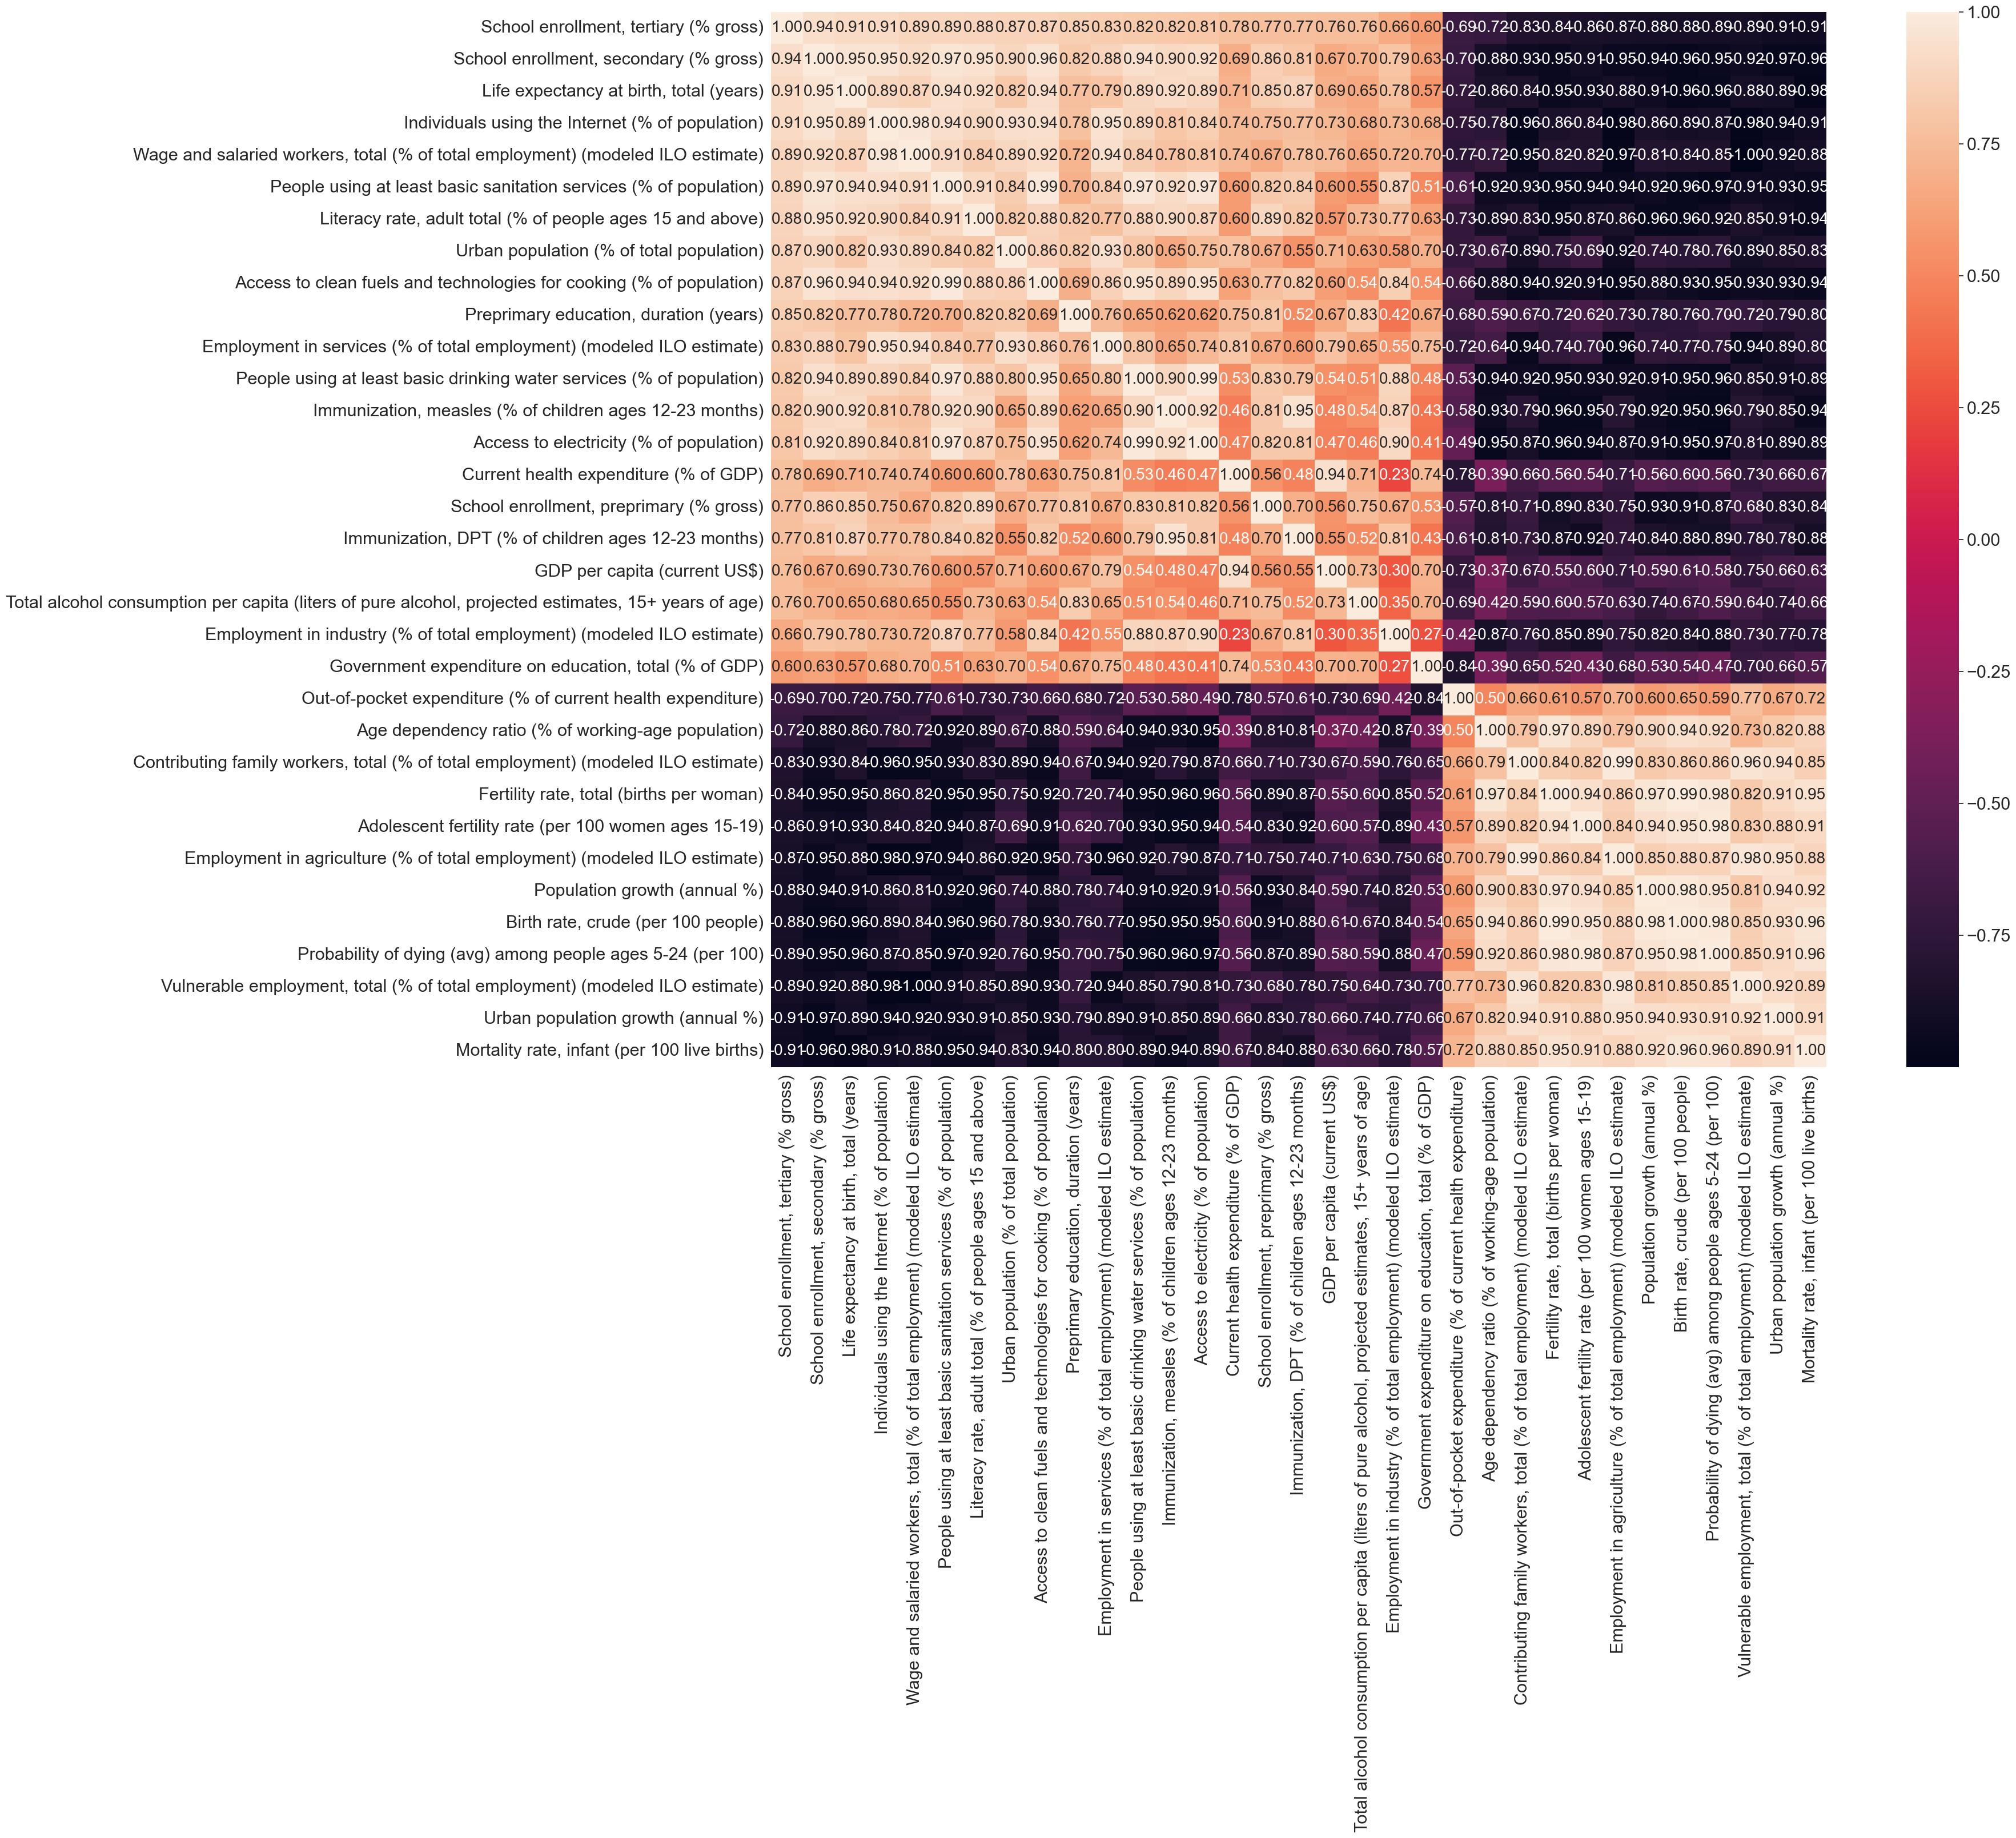

In [34]:
# generate correlation matrix to see relationships to target
corrmat = tee.drop(columns=['Country Name']).corr()
k = 33
cols = corrmat.nlargest(k, 'School enrollment, tertiary (% gross)')['School enrollment, tertiary (% gross)'].index

cm = np.corrcoef(tee[cols].values.T)
sns.set(font_scale = 2)
f, ax = plt.subplots(figsize=(36,24))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':20},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show

The strongest correlation shown here is secondary school enrollment, so we will look into this one a bit further. Before doing so, we can see there are still many features and we can trim down a bit more in preparation for modeling, starting with relatively weaker correlations. In this case, we will consider weaker correlations to be within the 0.6 to 0.75 range. These include:
 - _Positive correlations_
  - Government expenditure on education, total (% of GDP)
  - Employment in industry (% of total employment) (modeled ILO estimate)
  - Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)
  - GDP per capita (current US$)$
 - _Negative correlations_
  - Out-of-pocket expenditure (% of current health expenditure)
  - Age dependency ratio (% of working-age population)

In [35]:
tee_4 = tee.copy()
tee_4.drop(columns=['Government expenditure on education, total (% of GDP)', \
                    'Employment in industry (% of total employment) (modeled ILO estimate)', \
                    'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', \
                    'GDP per capita (current US$)', 'Out-of-pocket expenditure (% of current health expenditure)', \
                    'Age dependency ratio (% of working-age population)'], inplace=True)

In [36]:
tee_4.shape

(41, 28)

Text(0.5, 1.0, 'Correlation between Secondary and Tertiary Enrollment, 2019')

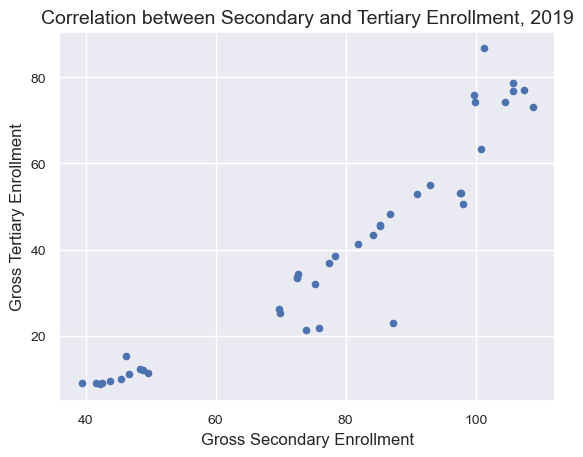

In [37]:
# create scatter plot of secondary-tertiary correlation
tee.plot.scatter(x='School enrollment, secondary (% gross)', y='School enrollment, tertiary (% gross)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Gross Secondary Enrollment', fontsize=12)
plt.ylabel('Gross Tertiary Enrollment', fontsize=12)
plt.title('Correlation between Secondary and Tertiary Enrollment, 2019', size=14)

Text(0.5, 1.0, 'Tertiary Enrollment by Aggregate, 2019')

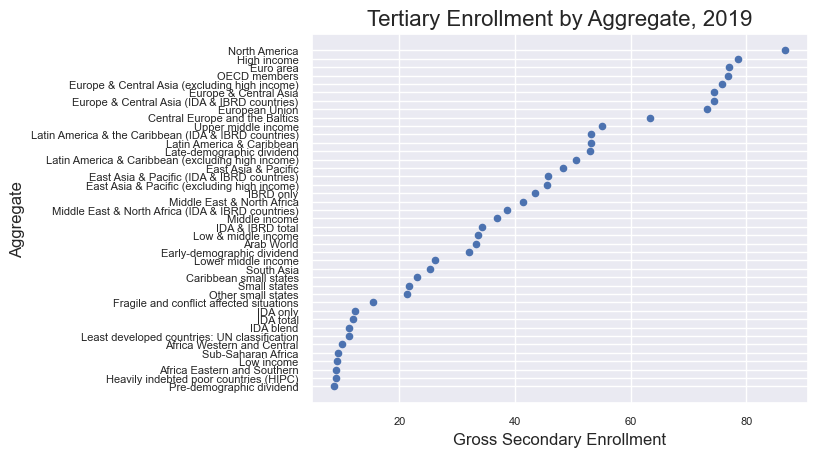

In [38]:
# plot secondary enrollment rates by aggregate
tee_tee = tee.sort_values('School enrollment, tertiary (% gross)', ascending=True)
tee_tee.plot.scatter(x='School enrollment, tertiary (% gross)', y='Country Name')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Gross Secondary Enrollment', fontsize=12)
plt.ylabel('Aggregate', fontsize=12)
plt.title('Tertiary Enrollment by Aggregate, 2019', size=16)

Text(0.5, 1.0, 'Secondary Enrollment by Aggregate, 2019')

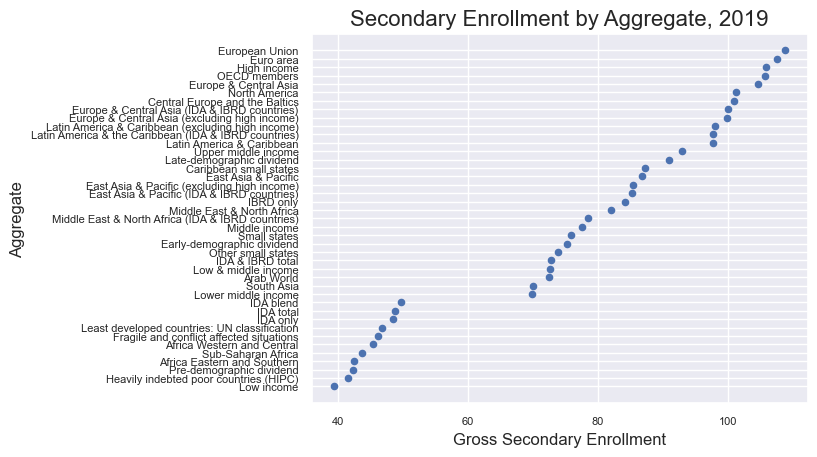

In [39]:
# plot secondary enrollment rates by aggregate
tee_sec = tee.sort_values('School enrollment, secondary (% gross)', ascending=True)
tee_sec.plot.scatter(x='School enrollment, secondary (% gross)', y='Country Name')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Gross Secondary Enrollment', fontsize=12)
plt.ylabel('Aggregate', fontsize=12)
plt.title('Secondary Enrollment by Aggregate, 2019', size=16)

Text(0.5, 1.0, 'Gross Tertiary and Secondary Enrollment, 2019')

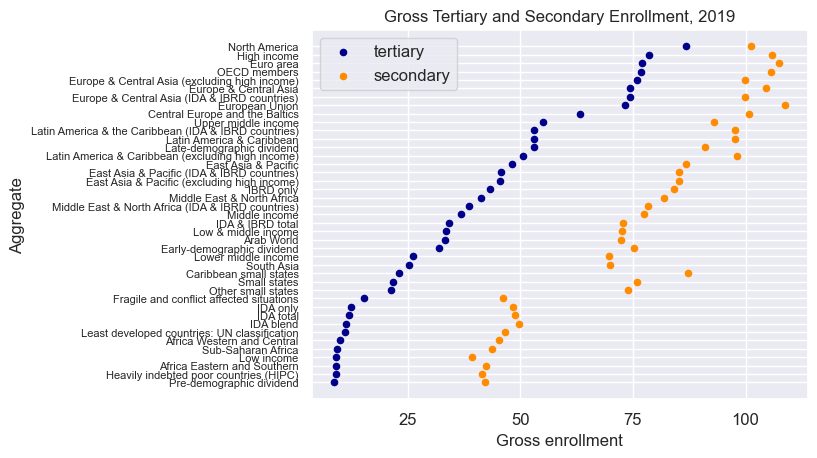

In [40]:
# plot tertiary and secondary school enrollment
# https://stackoverflow.com/questions/43061768/plotting-multiple-scatter-plots-pandas
tee = tee.sort_values('School enrollment, tertiary (% gross)')
ax1 = tee.plot(x = 'School enrollment, tertiary (% gross)', \
                y = 'Country Name', kind='scatter', color='DarkBlue', s=20, label='tertiary')
ax2 = tee.plot(x = 'School enrollment, secondary (% gross)', \
                y = 'Country Name', kind='scatter', color='DarkOrange', s=20, label='secondary', ax=ax1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=8)
plt.ylabel('Aggregate', fontsize=12)
plt.xlabel('Gross enrollment', fontsize=12)
plt.legend(prop={'size':12}, loc='upper left')
plt.title('Gross Tertiary and Secondary Enrollment, 2019', fontsize=12)

The list of features can still be trimmed some more. Up to this point, we have looked at correlation somewhat one-sided, meaning focusing on the features' effect on the target, understandably so. However, looking at a few other features like mortality rate and life expectancy, it is possible that, particularly for the latter, life expectancy is positively impacted by tertiary education enrollment rates. We can simply explore this using the seven regions.

Text(0.5, 1.0, 'Tertiary Education Enrollment by Region (2019)')

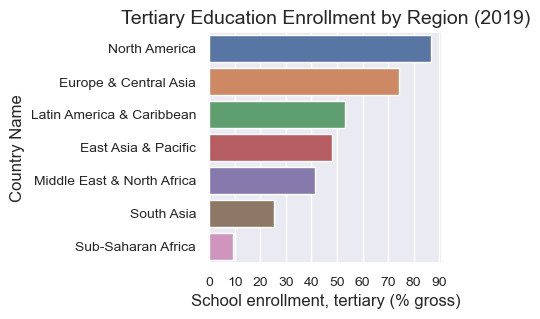

In [41]:
region = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', \
           'North America', 'South Asia', 'Sub-Saharan Africa']
agg_region = tee.loc[tee['Country Name'].isin(region)]
agg_region = agg_region.sort_values('Country Name').reset_index(drop=True)

plt.figure(figsize=(3,3))
plt.xticks(range(0,110,10), fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('School enrollment, tertiary (% gross)', fontsize=12)
sns.barplot(x = 'School enrollment, tertiary (% gross)', y = 'Country Name', \
                 data = agg_region, order=agg_region.groupby('Country Name')\
                ['School enrollment, tertiary (% gross)'].agg('sum').sort_values(ascending=False).index)\
                .set_title('Tertiary Education Enrollment by Region (2019)',size=14)

Based on an [article](https://genus.springeropen.com/articles/10.1186/s41118-019-0055-0) published in the Journal of Population Sciences in 2019, countries in which students pursued higher education also experienced higher life expectancy. While this is not to say that such a change is automatic, higher education could contribute to this shift, given the use of advanced cognitive and research ability, coupled with increased human capital investment, leading highly educated people to be more health conscious and avoid risky health-related behaviors. The study, on which this article is based, sampled population statistics from Italy, Denmark and the USA, including age-, sex-, and education-specific data, to assess the relationship(s) between higher education, life expectancy and mortality rates. 

As we saw in our EDA, the regions of North America and Europe & Central Asia top tertiary enrollment rates. The countries in this case study belonged to these regions, and also reported high life expectancy in 2019:

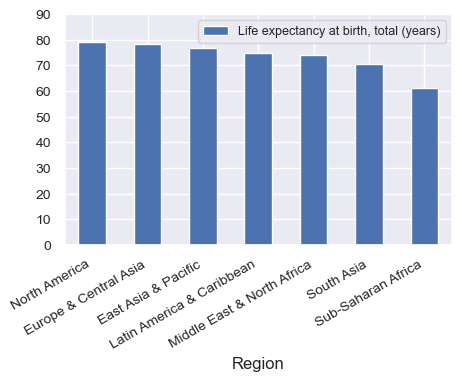

In [42]:
region = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', \
           'North America', 'South Asia', 'Sub-Saharan Africa']

agg_region_1 = agg_region.sort_values('Life expectancy at birth, total (years)',ascending=False)
agg_region_1.plot(y = 'Life expectancy at birth, total (years)', \
                x = 'Country Name', kind="bar", width=0.5, figsize=(5,3))

plt.xticks(fontsize=10, rotation=30, ha='right')
plt.yticks(range(0,100,10),fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.legend(prop={'size':9}, loc='upper right')

Additionally, a [study published in the Archives of Public Health](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7133023/) was conducted on countries in the Organization for Economic Cooperation and Development (OECD) for the period 1995 to 2015, using World Bank and OECD indicators. This study found that tertiary education significantly influences infant mortality, and that education plays an important role in the overall health quality of a country. Dated back even further, a [study of rural Thailand](https://www.jstor.org/stable/2060978?typeAccessWorkflow=login&seq=2) noted that families with more highly educated parents, who were more likely to incorporate modern healthcare methods and provide adequate care, saw lower infant mortality rates.

Further, examination of mortality (defined as probability of dying) and adult fertility rates in low-income and middle-income over the period 1970 to 2010, published in Child and Adolescent Health and Development ([Ch. 30](https://www.ncbi.nlm.nih.gov/books/NBK525273/)), revealed that improvements in female education drives declines in these two features. This study sourced data from the United Nations estimates.

Again, regions with higher tertiary enrollment rates also reported lower mortality and fertility rates in 2019:

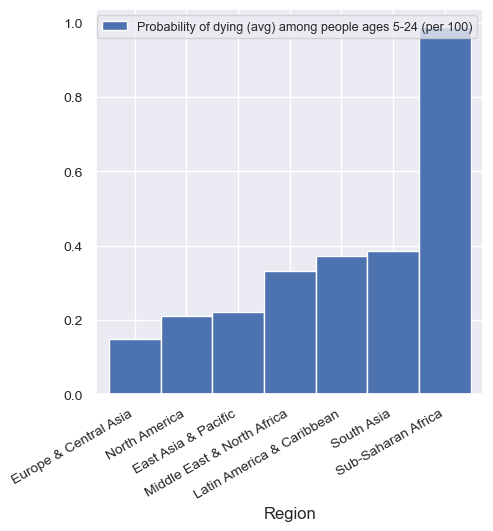

In [44]:
region = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', \
           'North America', 'South Asia', 'Sub-Saharan Africa']

agg_region_2a = agg_region.sort_values('Probability of dying (avg) among people ages 5-24 (per 100)')
agg_region_2a.plot(y = 'Probability of dying (avg) among people ages 5-24 (per 100)', \
                x = 'Country Name', kind="bar", width=1, figsize=(5,5))

plt.xticks(fontsize=10, rotation=30, ha='right')
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.legend(prop={'size':9}, loc='upper right')

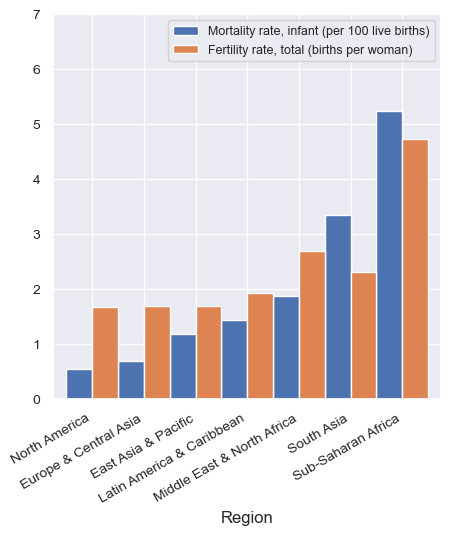

In [45]:
region = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', \
           'North America', 'South Asia', 'Sub-Saharan Africa']

agg_region_2b = agg_region.sort_values('Mortality rate, infant (per 100 live births)')
agg_region_2b.plot(y = ['Mortality rate, infant (per 100 live births)', 'Fertility rate, total (births per woman)'], \
                x = 'Country Name', kind="bar", width=1, figsize=(5,5))

plt.xticks(fontsize=10, rotation=30, ha='right')
plt.yticks(range(0,8,1),fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.legend(prop={'size':9}, loc='upper right')

Because of the nature of the target's relationship with these features, we will drop them and further reduce the dimensionality of this dataset.

In [46]:
tee_4.drop(columns=['Life expectancy at birth, total (years)', \
                    'Probability of dying (avg) among people ages 5-24 (per 100)', \
                    'Mortality rate, infant (per 100 live births)', \
                    'Fertility rate, total (births per woman)'], inplace=True)

In [47]:
tee_4.shape

(41, 24)

<function matplotlib.pyplot.show(close=None, block=None)>

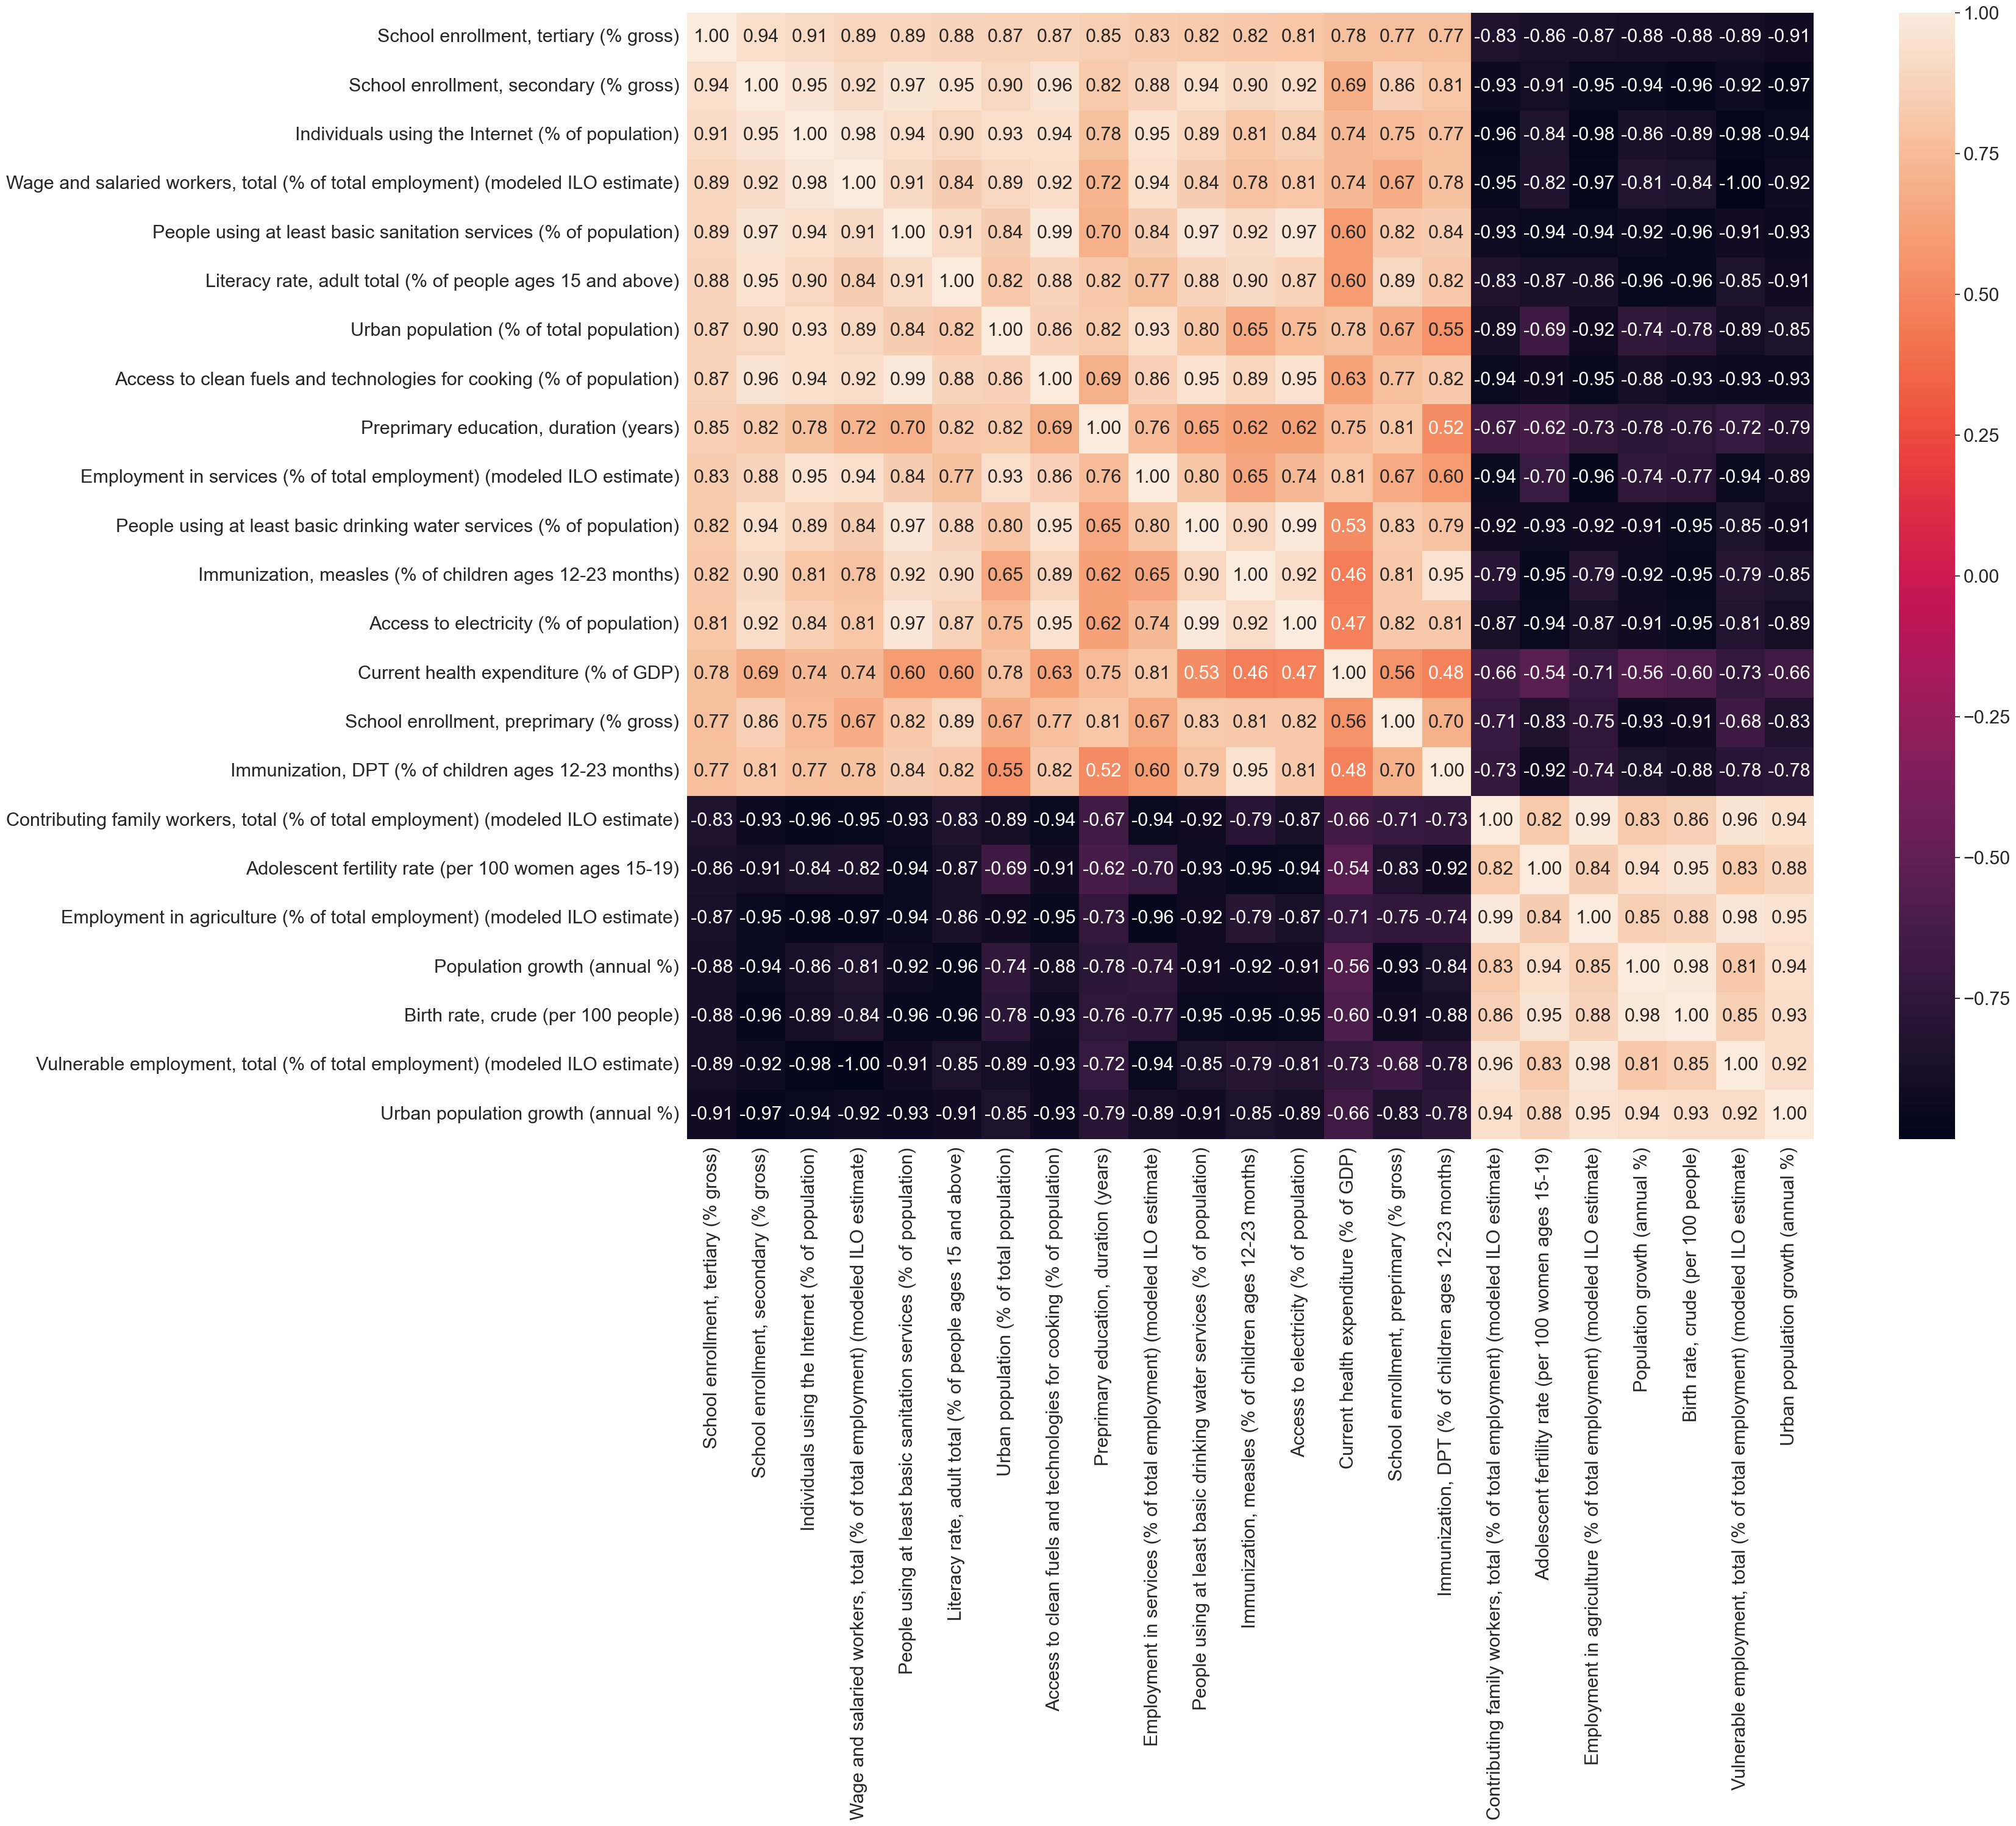

In [48]:
corrmat = tee_4.drop(columns=['Country Name']).corr()
k = 23
cols = corrmat.nlargest(k, 'School enrollment, tertiary (% gross)')['School enrollment, tertiary (% gross)'].index

cm = np.corrcoef(tee_4[cols].values.T)
sns.set(font_scale = 2)
f, ax = plt.subplots(figsize=(36,24))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':22},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show

### Machine learning - regression

In [49]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Principal component regression

In [50]:
# Create a pipeline with PCA and linear regression,
# https://www.geeksforgeeks.org/principal-component-regression-pcr/

# using 9 principal components
pca = PCA(n_components=9)  
lin_reg = LinearRegression()
pipeline = Pipeline(steps=[('pca', pca), ('lin_reg', lin_reg)])

# define features
X = tee_4.drop(columns=['School enrollment, tertiary (% gross)','Country Name'], axis=1)
# define target
y = tee_4['School enrollment, tertiary (% gross)']

# fit the pipeline to the data
pipeline.fit(X, y)
  
# predict the labels for the data
y_pred = pipeline.predict(X)

In [51]:
# Evaluation metrics
r2 = pipeline.score(X, y)
print(f'R^2 Score: {r2:.2f}')

mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

R^2 Score: 0.94
Mean Absolute Error: 4.12
Mean Squared Error: 33.23
Root Mean Squared Error: 5.76


Looking at the evaluation metrics, the R-squared score looks promising. It shows that 94% of the variance in our target variable can be explained by the features. A mean absolute error (MAE) of 4.12 tells us that, on average, the difference between our predicted and actual values is just over 4 units. Mean squared error and root mean squared error were a bit harsher; their sensitivity to the outliers in this dataset, compared to MAE, likely contribute to this.

#### Random forest regressor

In [52]:
# define features
X = tee_4.drop(columns=['School enrollment, tertiary (% gross)','Country Name'], axis=1)
# define target
y = tee_4['School enrollment, tertiary (% gross)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=705)

In [53]:
print('Training set: ' + str(len(X_train)))
print('Test set: ' + str(len(X_test)))

Training set: 30
Test set: 11


In [54]:
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 705)
# fit random forest model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=705)

In [55]:
# calculate training accuracy
y_pred_train = rf_model.predict(X_train)
print(r2_score(y_train, y_pred_train))

# calculate test accuracy
y_pred_test = rf_model.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.9562339971692996
0.9710924833753175


In [56]:
# print list of actual target values
print(y_train.to_numpy())
print(y_test.to_numpy())

[74.3503418  77.01676178  9.45162964  9.01850033 86.70834351 74.35861969
 45.51285172 78.56021881 10.00479031 73.15084076 23.03       25.30084991
 45.76940155 11.3569603  41.36656189 63.34917831 50.56898117  9.14803982
  9.0961504  52.9509201  33.31344986 75.8442688  21.7329998  31.97319031
 12.37195015 48.21516037 38.55060959 54.97436905 53.1318512  43.38542938]
[11.20431042 76.8963623  21.27652931 15.35962009 36.82424164 53.14294052
 12.03509045  8.73826981 33.64041138 34.24385071 26.11603928]


In [57]:
# print list of predicted target values
print(y_pred_train)
print(y_pred_test)

[75.73719025 77.21273575 10.57831182  9.09548616 70.11276525 74.92298813
 44.26150551 74.63612442 11.04688292 74.69720917 43.98032695 27.6581541
 44.33847046 12.59756222 39.62191353 66.79704704 50.45895481  9.13508587
  9.42891932 53.153265   33.35040608 76.03514786 21.85344086 30.94917126
 11.78788605 48.61145325 33.84819088 53.41078529 54.82084713 45.03151512]
[10.46203613 69.61095555 23.36827087 12.62249203 33.5702694  54.82084713
 12.72399101 11.22828283 28.14516602 32.00899105 27.52426796]


In [58]:
mae_rf = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae_rf:.2f}')

mse_rf = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse_rf:.2f}')

rmse_rf = np.sqrt(mse_rf)
print(f'Root Mean Squared Error: {rmse_rf:.2f}')

Mean Absolute Error: 2.74
Mean Squared Error: 11.16
Root Mean Squared Error: 3.34


The Random Forest model performed well on the training set, with a score of 95.6%, and on the test set with a score of 97.1%.

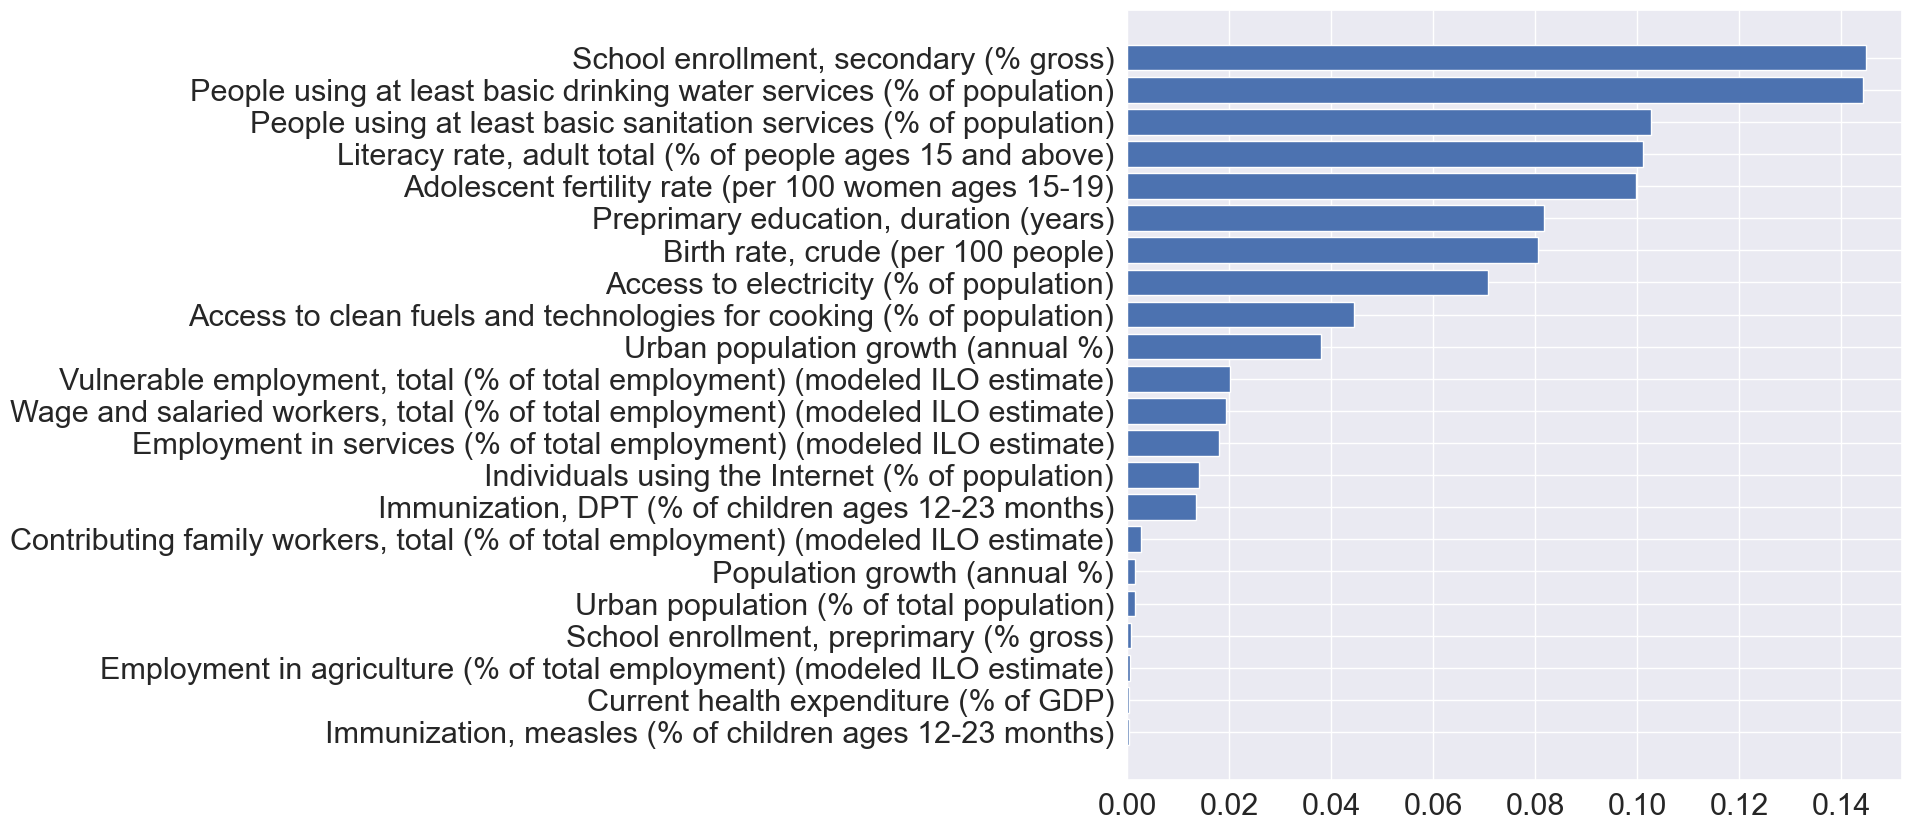

In [59]:
# https://onestopdataanalysis.com/python-random-forest-regression/
# rank training features by importance
plt.figure(figsize=(10,10))
f_i = list(zip(X_train,rf_model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

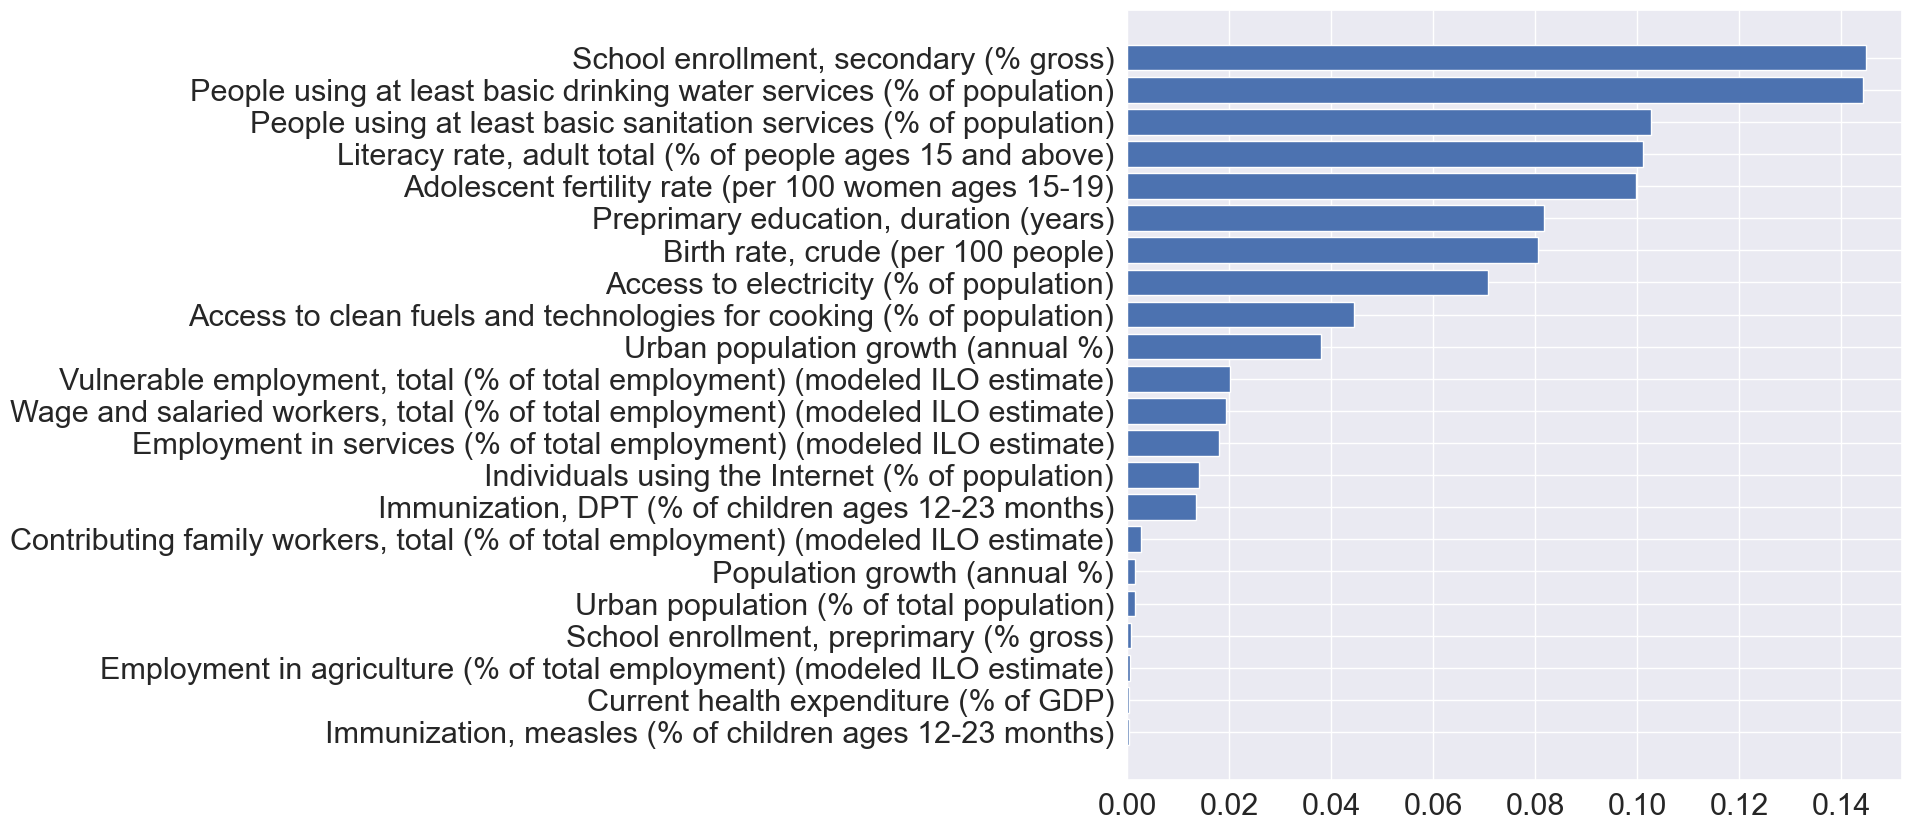

In [60]:
# rank test features by importance
plt.figure(figsize=(10,10))
f_i = list(zip(X_test,rf_model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

Among the strongest feature-target correlations are secondary school enrollment, access to basic water and sanitation services, literacy rate, adolescent fertility rate and duration of preprimary education.

Text(0.5, 1.0, 'Percentage of population using at least basic water and sanitation, by region, 2019')

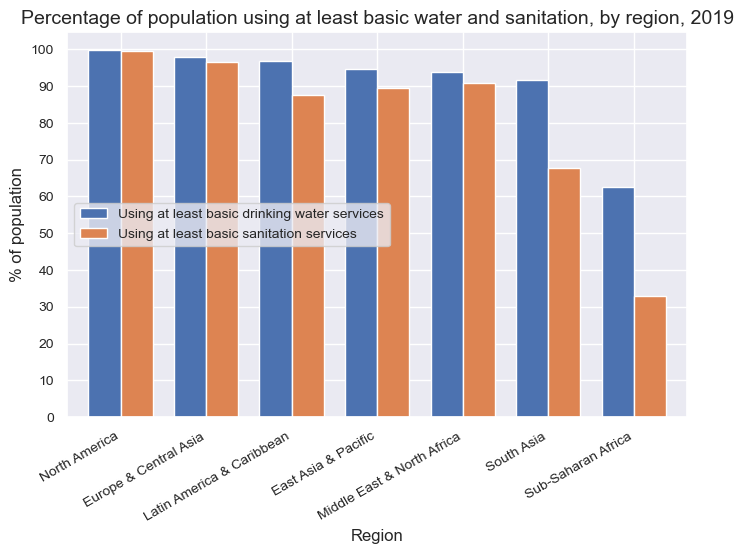

In [61]:
region = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', \
           'North America', 'South Asia', 'Sub-Saharan Africa']

agg_region_3 = agg_region.sort_values('People using at least basic drinking water services (% of population)', ascending=False)
agg_region_3.plot(y = ['People using at least basic drinking water services (% of population)', \
                     'People using at least basic sanitation services (% of population)'], \
                x = 'Country Name', kind="bar", width=0.75, figsize=(8,5))
colors = {'Using at least basic drinking water services':'blue','Using at least basic sanitation services':'orange'}
labels = list(colors.keys())
plt.xticks(fontsize=10, rotation=30, ha='right')
plt.yticks(range(0,110,10),fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('% of population', fontsize=12)
plt.legend(labels, prop={'size':10}, loc='center left')
plt.title('Percentage of population using at least basic water and sanitation, by region, 2019', fontsize=14)

Text(0.5, 1.0, 'Percentage of people age 15 and above who are literate, by region, 2019')

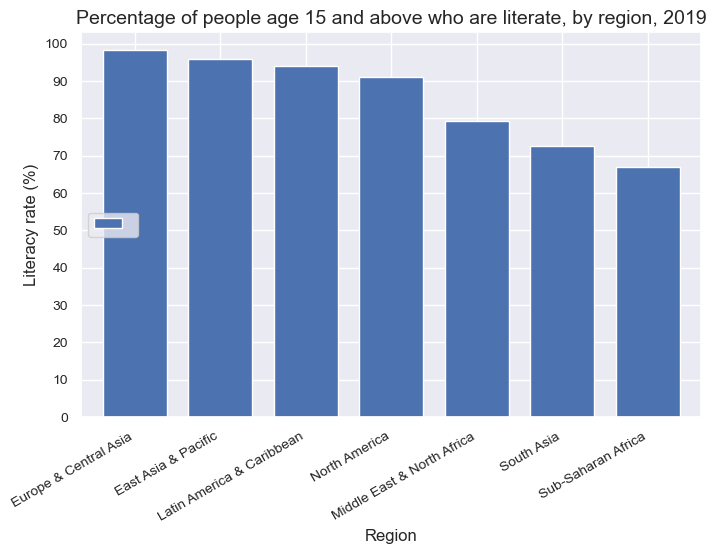

In [62]:
region = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', \
           'North America', 'South Asia', 'Sub-Saharan Africa']

agg_region_4 = agg_region.sort_values('Literacy rate, adult total (% of people ages 15 and above)', ascending=False)
agg_region_4.plot(y = 'Literacy rate, adult total (% of people ages 15 and above)', \
                  x = 'Country Name', kind="bar", width=0.75, figsize=(8,5))

colors = {'':''}
labels = list(colors.keys())

plt.xticks(fontsize=10, rotation=30, ha='right')
plt.yticks(range(0,110,10),fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Literacy rate (%)', fontsize=12)
plt.legend(labels, prop={'size':10}, loc='center left')
plt.title('Percentage of people age 15 and above who are literate, by region, 2019', fontsize=14)

#### Linear regression

Coefficients:  [ -0.05879578   1.4746956   -5.79913029   5.74637775  -2.42335966
  -1.89691622   4.7921265    1.41861321   1.1416999   -2.09072266
   0.39016242  -1.24672762  -1.88251174  -0.32530215 -35.16907586
   1.05962545  -0.05681948   0.33542303   1.9513346    2.72297871
  -0.90782436   0.10803924]
Variance score (train): 0.9995201977753777
Variance score (test): 0.9335264136001528


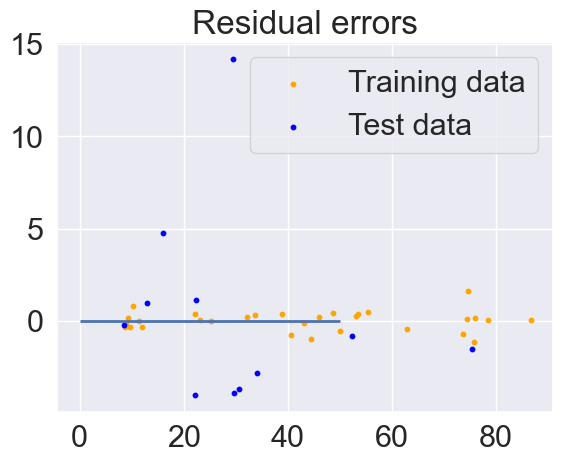

In [63]:
# https://www.geeksforgeeks.org/linear-regression-python-implementation/
from sklearn import linear_model, metrics
 
# create linear regression object
lr_model = linear_model.LinearRegression()
# fit linear regression model
lr_model.fit(X_train, y_train)
 
# print regression coefficients and variance score
print('Coefficients: ', lr_model.coef_)
print('Variance score (train): {}'.format(lr_model.score(X_train, y_train)))
print('Variance score (test): {}'.format(lr_model.score(X_test, y_test)))
 
# plot residual errors
# plotting residual errors in training data
plt.scatter(lr_model.predict(X_train), lr_model.predict(X_train) - y_train, color="orange", s=10, label='Training data')
# plotting residual errors in test data
plt.scatter(lr_model.predict(X_test), lr_model.predict(X_test) - y_test, color="blue", s=10, label='Test data')
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
 
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()

In [64]:
predictions = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae_lr:.2f}')

mse_lr = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse_lr:.2f}')

rmse_lr = np.sqrt(mse_lr)
print(f'Root Mean Squared Error: {rmse_lr:.2f}')

Mean Absolute Error: 3.46
Mean Squared Error: 25.66
Root Mean Squared Error: 5.07


This model scored near 100% on the training set and 93.4% on the test set, an indication of overfitting. Its MAE, MSE and RMSE were a bit better than that of PCR.

#### KNN

In [65]:
knn_model = KNeighborsRegressor(n_neighbors=9)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [66]:
print("Training set:")
train_preds = knn_model.predict(X_train)
r2_knn = r2_score(y_train, train_preds)
print(f'R^2 score: {r2_knn:.2f}')
mse_knn = mean_squared_error(y_train, train_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f} \n')

print("Test set:")
test_preds = knn_model.predict(X_test)
r2_knn = r2_score(y_test, test_preds)
print(f'R^2 score: {r2_knn:.2f}')
mse_knn = mean_squared_error(y_test, test_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f}')

Training set:
R^2 score: 0.84
Mean Squared Error: 98.72
Root Mean Squared Error: 9.94 

Test set:
R^2 score: 0.88
Mean Squared Error: 47.45
Root Mean Squared Error: 6.89


In [67]:
#find ideal k neighbors (optimize)
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 10)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 10)})

In [68]:
gridsearch.best_params_

{'n_neighbors': 1}

Text(0.5, 1.0, 'ELBOW PLOT')

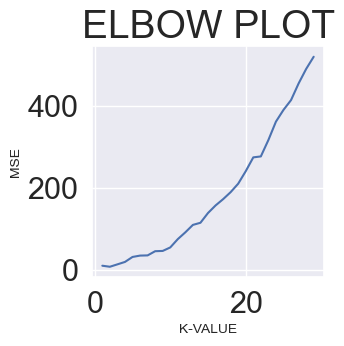

In [69]:
fig,ax=plt.subplots(figsize=(3,3))
k_list=np.arange(1,30,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=10)
ax.set_ylabel('MSE' ,fontsize=10)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [70]:
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [71]:
print("Training set:")
train_preds = knn_model.predict(X_train)
r2_knn = r2_score(y_train, train_preds)
print(f'R^2 score: {r2_knn:.2f}')
mse_knn = mean_squared_error(y_train, train_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f} \n')

print("Test set:")
test_preds = knn_model.predict(X_test)
r2_knn = r2_score(y_test, test_preds)
print(f'R^2 score: {r2_knn:.2f}')
mse_knn = mean_squared_error(y_test, test_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f}')

Training set:
R^2 score: 1.00
Mean Squared Error: 0.00
Root Mean Squared Error: 0.00 

Test set:
R^2 score: 0.97
Mean Squared Error: 11.38
Root Mean Squared Error: 3.37


With the ideal k-value equal to 1, since the closest training value to a test value is only one nearest neighbor, it will keep choosing itself, resulting in overfitting. This is also indicated by a score of 100% accuracy for training data, while the test set scored 97%.

In [72]:
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [73]:
print("Training set:")
train_preds = knn_model.predict(X_train)
r2_knn = r2_score(y_train, train_preds)
print(f'R^2 score: {r2_knn:.2f}')
mse_knn = mean_squared_error(y_train, train_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f} \n')

print("Test set:")
test_preds = knn_model.predict(X_test)
r2_knn = r2_score(y_test, test_preds)
print(f'R^2 score: {r2_knn:.3f}')
mse_knn = mean_squared_error(y_test, test_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f}')

Training set:
R^2 score: 0.98
Mean Squared Error: 13.17
Root Mean Squared Error: 3.63 

Test set:
R^2 score: 0.977
Mean Squared Error: 8.86
Root Mean Squared Error: 2.98


Increasing K only slightly lowers training accuracy to 98%.

In [74]:
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [75]:
print("Training set:")
train_preds = knn_model.predict(X_train)
r2_knn = r2_score(y_train, train_preds)
print(f'R^2 score: {r2_knn:.2f}')
mse_knn = mean_squared_error(y_train, train_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f} \n')

print("Test set:")
test_preds = knn_model.predict(X_test)
r2_knn = r2_score(y_test, test_preds)
print(f'R^2 score: {r2_knn:.3f}')
mse_knn = mean_squared_error(y_test, test_preds)
print(f'Mean Squared Error: {mse_knn:.2f}')
rmse_knn = np.sqrt(mse_knn)
print(f'Root Mean Squared Error: {rmse_knn:.2f}')

Training set:
R^2 score: 0.92
Mean Squared Error: 48.34
Root Mean Squared Error: 6.95 

Test set:
R^2 score: 0.947
Mean Squared Error: 20.61
Root Mean Squared Error: 4.54


KNN model performance seems a bit more promising as the k-value is increased. Here with K = 4, training score is 92% and test score is 94.7%.

#### Decision tree

In [76]:
# decision tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [77]:
dt = DecisionTreeRegressor(max_depth=3, random_state=705)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=705)

In [78]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9861321301845909
0.94348418445129


In [79]:
dt.get_depth()

3

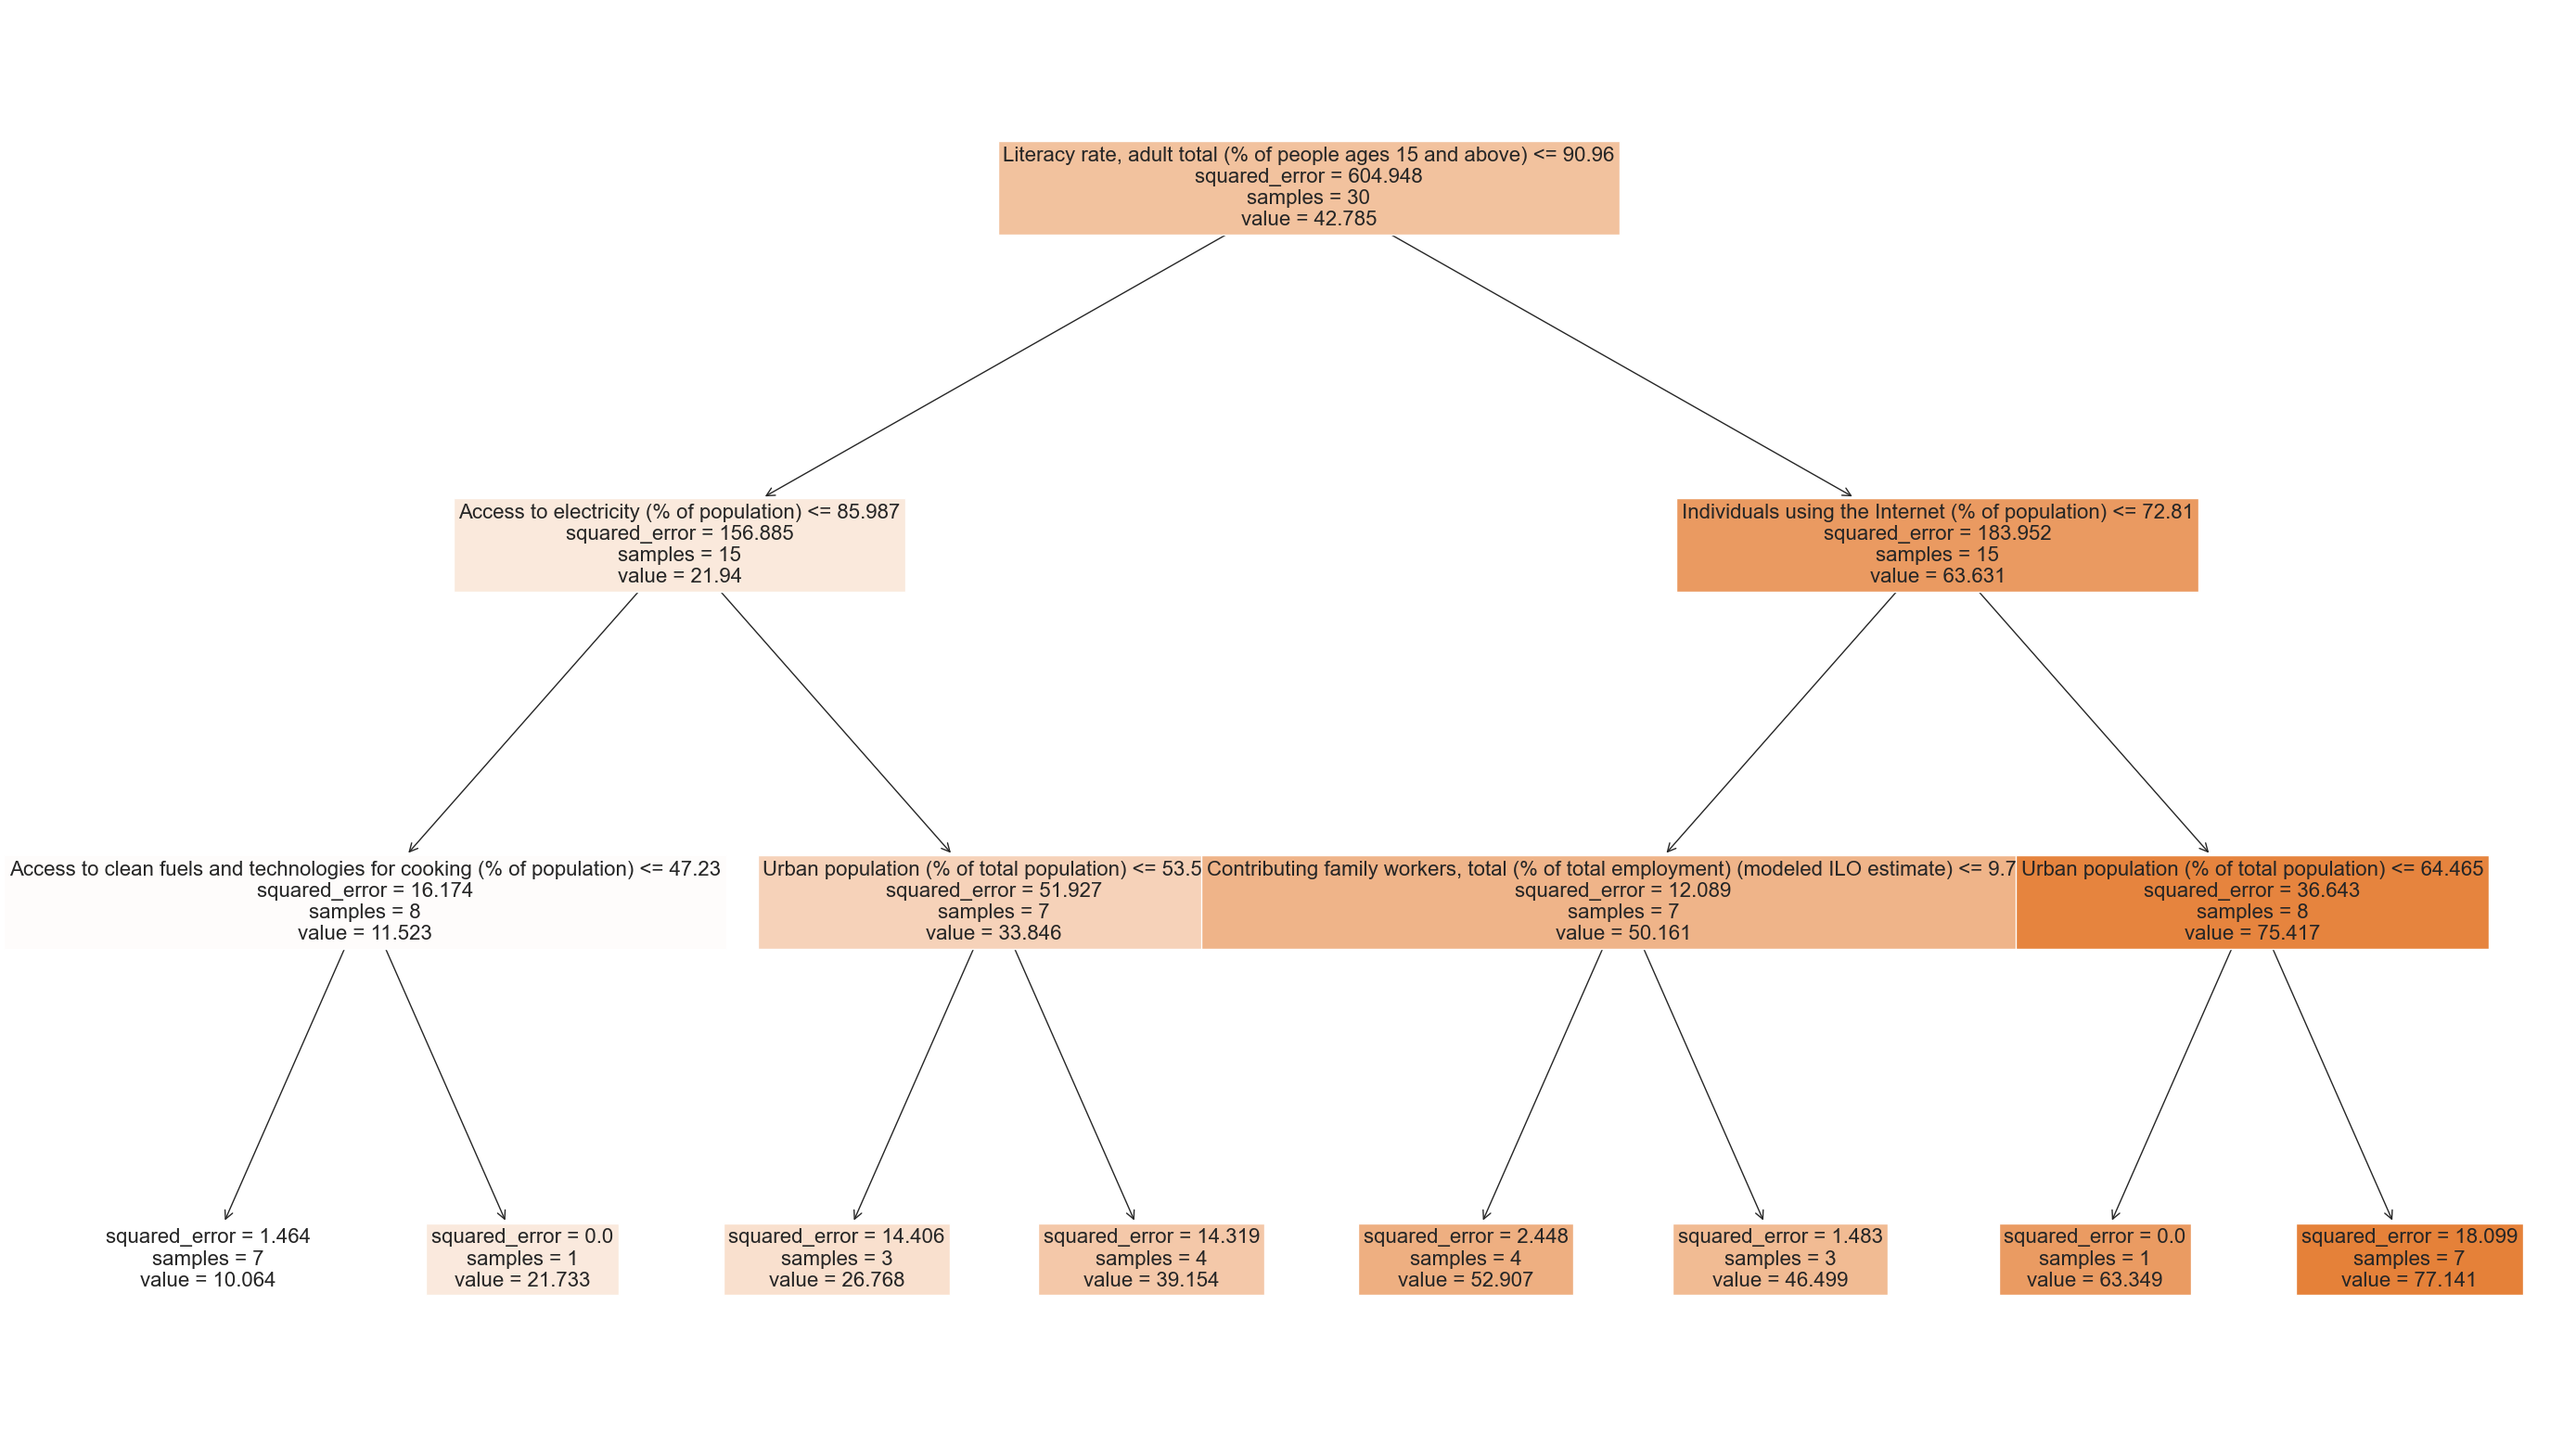

In [80]:
f = plt.figure(figsize=(35, 20))
_ = plot_tree(dt, fontsize=16, feature_names=X.columns, filled=True)

This model scored 98.6% on the training set and 94.3% on the test set, suggesting overfitting.

### Summary/Conclusions

This aggregate dataset started with 41 observations and 37 features. After briefly reviewing the dataset, that is, shape, columns, descriptive statistics, a correlation matrix was generated to view the relationships between features. Some feature engineering was attempted to reduce the number of features to work with, and scaling was done to align columns initially 'per 1000' to the majority 'per 100' columns.

Using tertiary education enrollment as the target variable, the weakest correlated features were removed, as well as those shown to be strongly influenced by or dependent on the target, reducing the dataset to 41 observations and 24 features. Several different regression models were used to analyze the dataset and choose top features. These were Principal Component Regression, Random Forest, Linear Regression, K-Nearest Neighbors and decision tree. The last three models showed signs of overfitting, indicated by a training score of or close to 100% and/or higher than the test score. 

The best performing model was Random Forest, with training accuracy of 95% and test accuracy of 97%. Mean absolute error was 2.74, while mean squared error and root mean squared error were 11.16 and 3.34, respectively. The strongest features selected by this model were secondary school enrollment, access to basic water and sanitation services, literacy rate, adolescent fertility rate, and duration of preprimary education.

Modeling could be improved by further reducing the number of features, increasing the size of the dataset, perhaps by further subdividing the different World Bank classification brackets and observing their performance. The target could be assessed using indicators drilled down to factors such as sex and race. Regression modeling could also be conducted with time series data, which would allow analysis to take into account impactful events such as economic shifts and catastrophic events.